# **SVM**

SVM classification. Use prepared CSV files from drive.

Files: phoneme_EEG_DTW_6AR.csv, phoneme_EEG_EMG_DTW_6AR.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
import numpy as np

import json

import seaborn as sns

### Open files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_6AR.csv'

dataset = pd.read_csv(file_)

- **DTW** - Discrete wavelet transform

- ***n*AR** - coefficient of autoregressive model of order *n* count

- **MAD** - meaning absolute deviation  

- **STD** - standart deviation  

In [9]:
dataset

person_id  label_phoneme  sector_id     channel     DTW_1_AR1  \
0             0              4          0   EEG F7-A1 -3.689450e-08   
1             0              4          0   EEG F3-A1 -5.260221e-08   
2             0              4          0   EEG T3-A1 -1.382687e-07   
3             0              4          0   EEG C3-A1 -1.247779e-08   
4             0              4          0   EEG Oz-A2 -3.843142e-08   
...         ...            ...        ...         ...           ...   
5497          5              6        182   EEG F3-A1  8.168804e-09   
5498          5              6        182   EEG T3-A1  3.194917e-07   
5499          5              6        182   EEG C3-A1  1.638230e-08   
5500          5              6        182   EEG Oz-A2  8.671086e-09   
5501          5              6        182  EEG Fpz-A2  2.918335e-07   

      DTW_1_AR2  DTW_1_AR3  DTW_1_AR4  DTW_1_AR5  DTW_1_AR6  ...  DTW_3_MAD  \
0      2.186456  -0.894568  -0.844046   0.507204   0.042892  ...   0.000018   
1      2.246774  -1.024776  -0.801961   0.571102   0.006034  ...   0.000014   
2      2.002525  -0.593704  -0.676793  -0.000371   0.264149  ...   0.000012   
3      2.226526  -1.124454  -0.433423   0.185079   0.143267  ...   0.000016   
4      1.985360  -0.599307  -0.597978  -0.106029   0.315633  ...   0.000010   
...         ...        ...        ...        ...        ...  ...        ...   
5497   1.871416  -0.398818  -0.465178  -0.451048   0.440219  ...   0.000019   
5498   1.798532  -0.206250  -0.764142  -0.144359   0.312317  ...   0.000018   
5499   2.003885  -0.583632  -0.780943   0.214964   0.138916  ...   0.000021   
5500   1.966795  -0.534348  -0.736526   0.046284   0.257093  ...   0.000018   
5501   1.989043  -0.517111  -0.845508   0.143058   0.229103  ...   0.000023   

      DTW_3_STD  DTW_4_AR1  DTW_4_AR2  DTW_4_AR3  DTW_4_AR4  DTW_4_AR5  \
0      0.000025  -0.000014   0.716037  -0.381325   0.362150  -0.126850   
1      0.000024  -0.000037   0.505876  -0.249766   0.346710  -0.107789   
2      0.000019  -0.000054   0.721968  -0.677282   0.401750  -0.179302   
3      0.000023  -0.000010   0.353688  -0.065376   0.275980   0.070757   
4      0.000016  -0.000017   0.713390  -0.344053   0.231115  -0.262428   
...         ...        ...        ...        ...        ...        ...   
5497   0.000025   0.000003   1.159849  -0.905658   0.393132  -0.280636   
5498   0.000021   0.000042   1.078611  -0.866535   0.484607  -0.247190   
5499   0.000028   0.000004   0.851614  -0.775386   0.362443  -0.648861   
5500   0.000021   0.000004   0.836481  -0.137646   0.310987  -0.030179   
5501   0.000038   0.000091   0.788762  -0.392226   0.568172  -0.219725   

      DTW_4_AR6  DTW_4_MAD  DTW_4_STD  
0      0.175612   0.000024   0.000034  
1     -0.188188   0.000021   0.000033  
2      0.157451   0.000013   0.000026  
3     -0.209499   0.000021   0.000032  
4      0.322079   0.000014   0.000023  
...         ...        ...        ...  
5497   0.240837   0.000027   0.000034  
5498   0.384268   0.000025   0.000032  
5499   0.522627   0.000030   0.000040  
5500  -0.068859   0.000024   0.000029  
5501   0.098750   0.000039   0.000057  

[5502 rows x 36 columns]

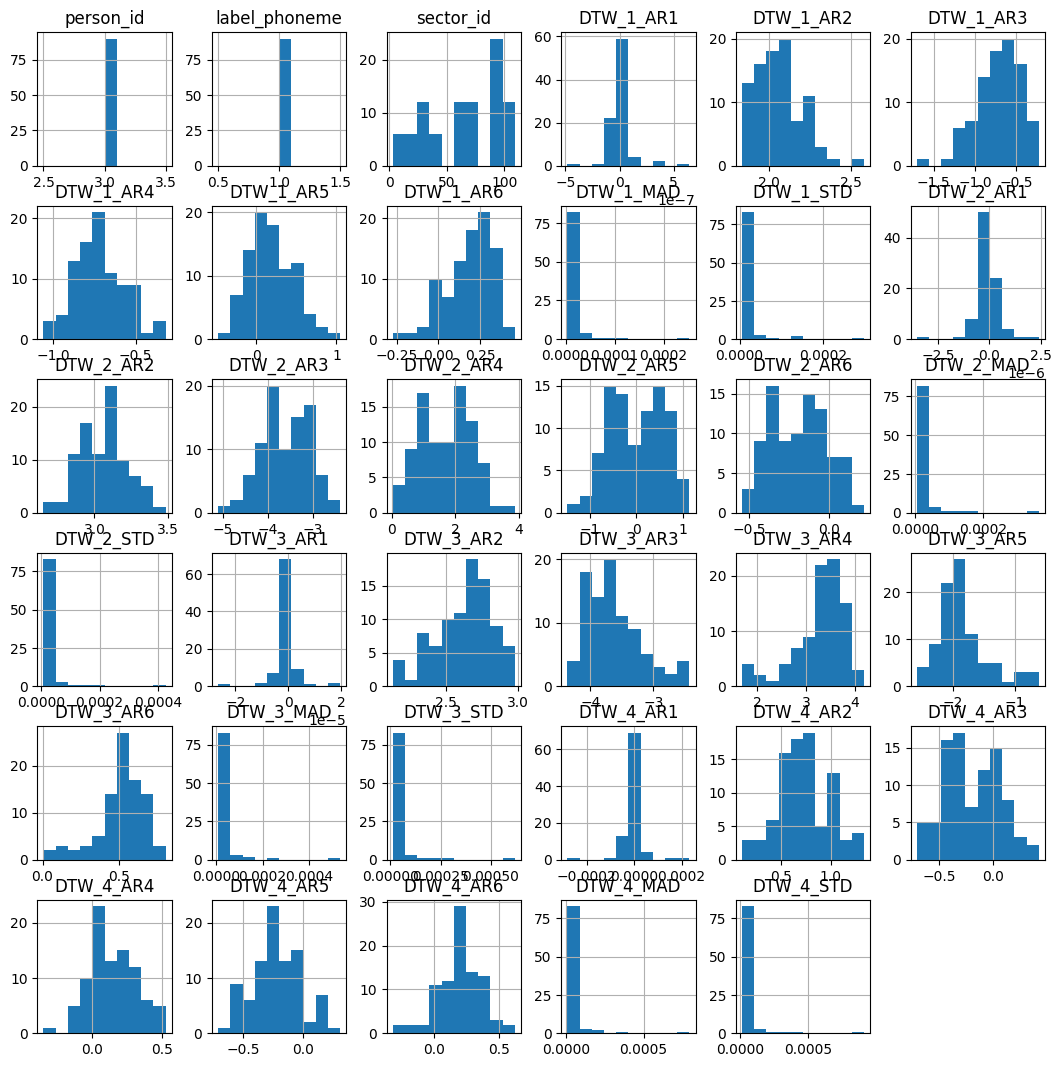

In [10]:
dataset.query('person_id == 3').query('label_phoneme == 1').hist(figsize=(13,13))
plt.show()

## Fixing test/train spliting

fixing numders of a segment. It don't depend from number of features

**Multiclass classification**



In [12]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [13]:
data = dict()
for i_person in range(6):

    sectors = dataset.query(f'person_id == {i_person}').groupby('sector_id')['sector_id'].max().values
    labels = dataset.query(f'person_id == {i_person}').groupby('sector_id')['label_phoneme'].max().values

    X_train_sectors, X_test_sectors, y_train, y_test = train_test_split(sectors, labels, test_size = 0.25, stratify=labels)

    data[i_person] = {
                    'X_train_sectors': list(X_train_sectors),
                    'X_test_sectors' : list(X_test_sectors),
                    'y_train' : list(y_train),
                    'y_test' : list(y_test),
                    }

with open('new_train_test_split_MuiltClass.json', 'w') as f:
    json.dump(data, f, cls=NpEncoder)

**Binary classification**

In [14]:
data =  dict(dict())
for i_person in range(6):
    binary_data = dict()
    for i_first_label in range(6):
        for i_second_label in range(i_first_label+1, 7):

            sectors = dataset.query(f'person_id == {i_person} and ( label_phoneme == {i_first_label} or label_phoneme == {i_second_label} )').groupby('sector_id')['sector_id'].max().values
            labels = dataset.query(f'person_id == {i_person} and ( label_phoneme == {i_first_label} or label_phoneme == {i_second_label} )').groupby('sector_id')['label_phoneme'].max().values

            X_train_sectors, X_test_sectors, y_train, y_test = train_test_split(sectors, labels, test_size = 0.25, stratify=labels)

            binary_data[f'phoneme {i_first_label} and {i_second_label}'] = {
                        'X_train_sectors': list(X_train_sectors),
                        'X_test_sectors' : list(X_test_sectors),
                        'y_train' : list(y_train),
                        'y_test' : list(y_test),
                        }

    data[i_person] =  binary_data

with open('new_train_test_split_BinaryClass.json', 'w') as f:
    json.dump(data, f, cls=NpEncoder)

# **SVM**

In [15]:
def bootstrap_metric(x,
                     y,
                     metric_fn,
                     samples_cnt=1000,
                     random_state=42):

    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True)

        x_boot = x[poses]
        y_boot = y[poses]

        m_val = metric_fn(x_boot, y_boot)
        b_metric[it] = m_val

    return b_metric

In [16]:
columns_4 = [
        'DTW_1_AR1', 'DTW_1_AR2', 'DTW_1_AR3', 'DTW_1_AR4', 'DTW_1_MAD', 'DTW_1_STD',
        'DTW_2_AR1', 'DTW_2_AR2', 'DTW_2_AR3', 'DTW_2_AR4', 'DTW_2_MAD', 'DTW_2_STD',
        'DTW_3_AR1', 'DTW_3_AR2', 'DTW_3_AR3', 'DTW_3_AR4', 'DTW_3_MAD', 'DTW_3_STD',
        'DTW_4_AR1', 'DTW_4_AR2', 'DTW_4_AR3', 'DTW_4_AR4', 'DTW_4_MAD', 'DTW_4_STD',
        ]

columns_6 = ['DTW_1_AR1', 'DTW_1_AR2', 'DTW_1_AR3', 'DTW_1_AR4', 'DTW_1_AR5', 'DTW_1_AR6', 'DTW_1_MAD', 'DTW_1_STD',
        'DTW_2_AR1', 'DTW_2_AR2', 'DTW_2_AR3', 'DTW_2_AR4', 'DTW_2_AR5', 'DTW_2_AR6', 'DTW_2_MAD', 'DTW_2_STD',
        'DTW_3_AR1', 'DTW_3_AR2', 'DTW_3_AR3', 'DTW_3_AR4', 'DTW_3_AR5', 'DTW_3_AR6', 'DTW_3_MAD', 'DTW_3_STD',
        'DTW_4_AR1', 'DTW_4_AR2', 'DTW_4_AR3', 'DTW_4_AR4', 'DTW_4_AR5', 'DTW_4_AR6', 'DTW_4_MAD', 'DTW_4_STD',
        ]

columns_8 = [
        'DTW_1_AR1', 'DTW_1_AR2', 'DTW_1_AR3', 'DTW_1_AR4', 'DTW_1_AR5', 'DTW_1_AR6', 'DTW_1_AR7', 'DTW_1_AR8', 'DTW_1_MAD', 'DTW_1_STD',
        'DTW_2_AR1', 'DTW_2_AR2', 'DTW_2_AR3', 'DTW_2_AR4', 'DTW_2_AR5', 'DTW_2_AR6', 'DTW_2_AR7', 'DTW_2_AR8', 'DTW_2_MAD', 'DTW_2_STD',
        'DTW_3_AR1', 'DTW_3_AR2', 'DTW_3_AR3', 'DTW_3_AR4', 'DTW_3_AR5', 'DTW_3_AR6', 'DTW_3_AR7', 'DTW_3_AR8', 'DTW_3_MAD', 'DTW_3_STD',
        'DTW_4_AR1', 'DTW_4_AR2', 'DTW_4_AR3', 'DTW_4_AR4', 'DTW_4_AR5', 'DTW_4_AR6', 'DTW_4_AR7', 'DTW_4_AR8', 'DTW_4_MAD', 'DTW_4_STD',
        ]

# **Multiclass SVM classification**

## Open test/train split **file**

In [ ]:
with open('/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/train_test_split_MuiltClass.json', 'r') as file:
    python_obj = json.load(file)
print(python_obj)

{'0': {'X_train_sectors': [36, 43, 139, 28, 41, 144, 86, 146, 34, 169, 38, 32, 65, 143, 124, 141, 3, 123, 117, 164, 89, 17, 95, 166, 84, 119, 147, 102, 113, 93, 23, 149, 73, 126, 31, 172, 74, 10, 148, 66, 39, 132, 109, 18, 15, 112, 54, 76, 98, 110, 94, 111, 0, 103, 12, 105, 7, 61, 55, 14, 138, 51, 170, 56, 92, 167, 97, 58, 21, 151, 81, 127, 168, 140, 114, 120, 87, 163, 30, 135, 52, 161, 69, 8, 129, 68, 85, 57, 133, 33, 50, 20, 75, 145, 62, 157, 71, 90, 100, 37, 136, 67, 99, 22, 29, 88, 64, 9, 155, 137, 156, 152, 78, 53, 101, 104, 159, 49, 40, 142, 4, 116, 96, 160, 42, 80, 5, 130, 24], 'X_test_sectors': [128, 91, 115, 107, 2, 11, 150, 83, 44, 25, 162, 1, 165, 70, 60, 59, 27, 106, 171, 154, 82, 158, 77, 48, 79, 121, 63, 125, 118, 47, 72, 45, 131, 108, 16, 19, 26, 13, 6, 46, 153, 134, 122, 35], 'y_train': [3, 1, 4, 6, 5, 2, 6, 4, 2, 3, 6, 1, 3, 1, 6, 2, 2, 2, 2, 5, 2, 0, 2, 4, 2, 6, 4, 0, 3, 3, 6, 1, 2, 6, 5, 6, 4, 3, 3, 0, 1, 6, 4, 4, 0, 0, 0, 5, 6, 2, 5, 1, 4, 0, 2, 3, 4, 5, 6, 3, 0, 4,

## Experements with SVM Kernel

### 4 AR

In [ ]:
file_ = myography_prosebaya_path = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_4AR.csv'
dataset = pd.read_csv(file_)

In [ ]:
from sklearn.metrics import f1_score

all_boot_f1score_m1  = []
for decision_function_shape in ('ovo', 'ovr'):
    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        print(f'---- kernel - {kernel} | decision_function_shape - {decision_function_shape} ---- ')
        for i_person in range(6):

            X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
            X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
            y_train = python_obj[f'{i_person}']['y_train']
            y_test = np.array(python_obj[f'{i_person}']['y_test'])

            df = dataset.query(f'person_id == {i_person}')
            df.set_index("sector_id", inplace = True)
            a = df[columns_4]

            X_train = []
            for n in X_train_sectors:
                all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
                X_train.append(all.reshape(-1))

            X_test = []
            for n in  X_test_sectors:
                all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
                X_test.append(all.reshape(-1))

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            clf = SVC(kernel = kernel, decision_function_shape= decision_function_shape )
            clf.fit(X_train, y_train)
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes: 7*6/2 = 21

            clf.decision_function_shape = decision_function_shape
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes

            predicted = clf.predict(X_test)

            boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
            all_boot_f1score_m1.append(boot_f1score_m1)

            alpha = 0.10
            print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

---- kernel - linear | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.05963068 0.24941184]
Испытуемый 1: F1 score - [0.09745241 0.28804726]
Испытуемый 2: F1 score - [0.13517665 0.39251861]
Испытуемый 3: F1 score - [0.07142857 0.34310012]
Испытуемый 4: F1 score - [0.08389985 0.29948657]
Испытуемый 5: F1 score - [0.07879356 0.26914013]
---- kernel - poly | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.12706612 0.39622642]
Испытуемый 1: F1 score - [0.12031924 0.36512946]
Испытуемый 2: F1 score - [0.11947431 0.43940715]
Испытуемый 3: F1 score - [0.06857143 0.39393939]
Испытуемый 4: F1 score - [0.14473684 0.41189931]
Испытуемый 5: F1 score - [0.08127914 0.31884058]
---- kernel - rbf | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.09391984 0.29817513]
Испытуемый 1: F1 score - [0.05119048 0.22866835]
Испытуемый 2: F1 score - [0.01067588 0.24224324]
Испытуемый 3: F1 score - [0.0958708  0.36371724]
Испытуемый 4: F1 score - [0.09236058 0.34060

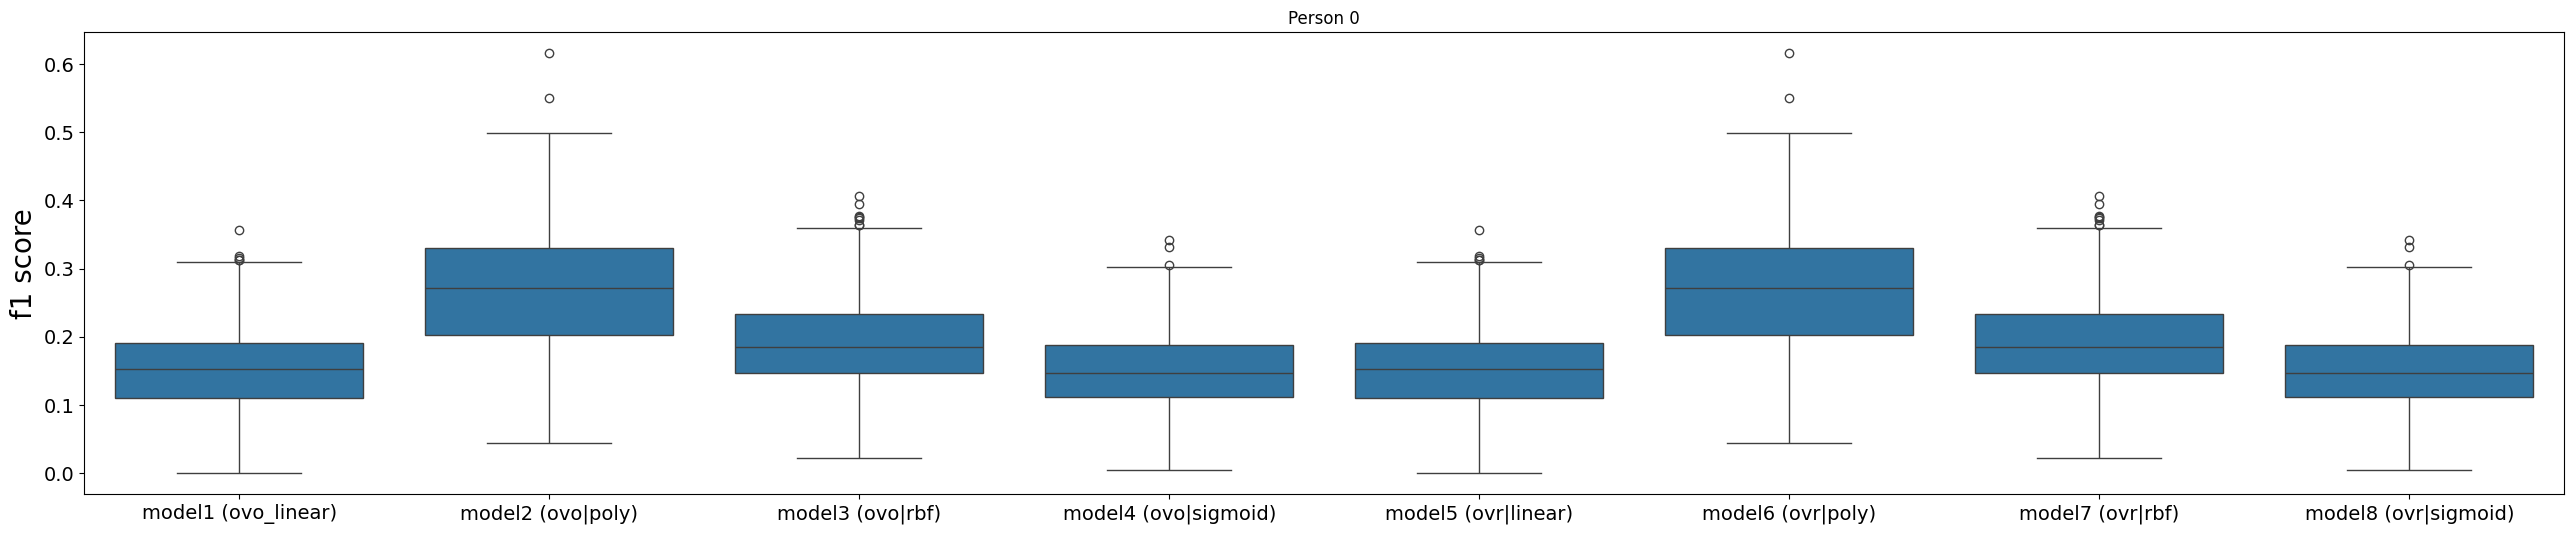

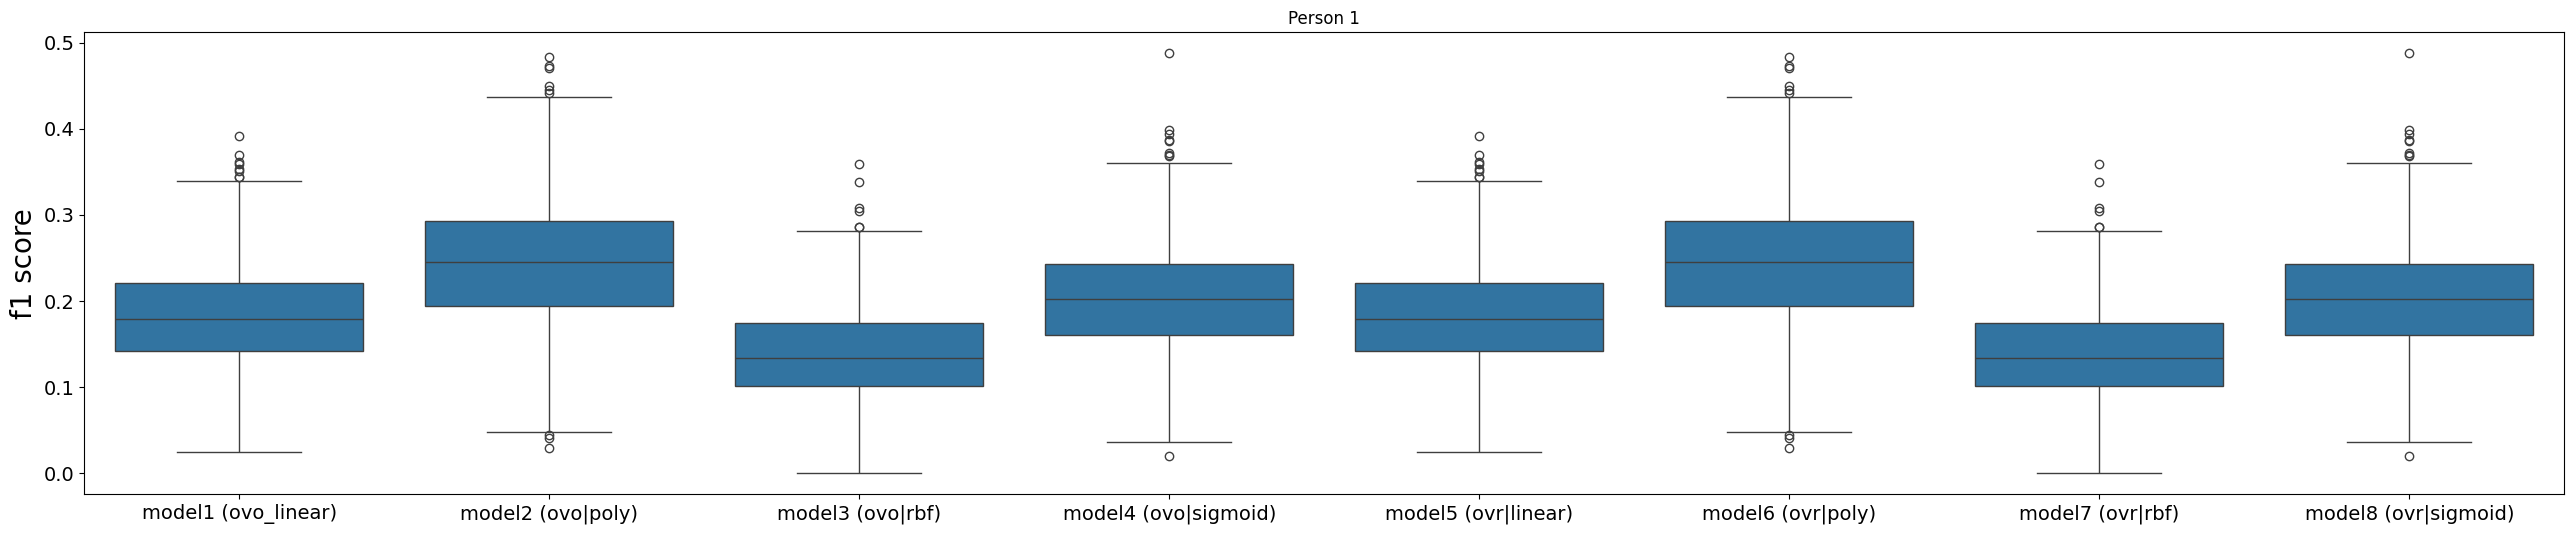

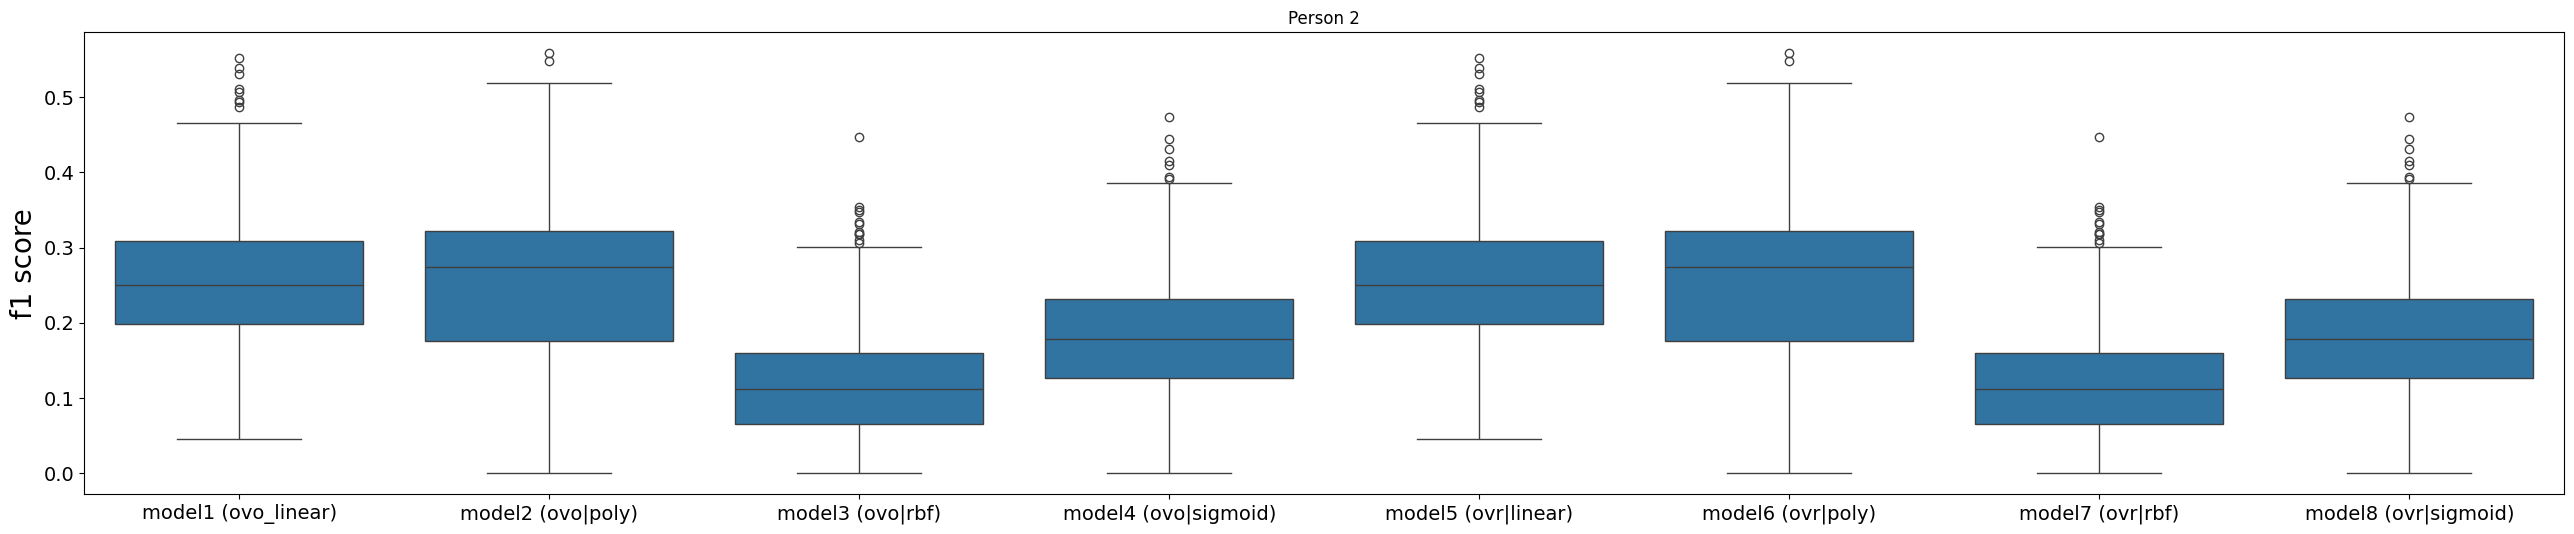

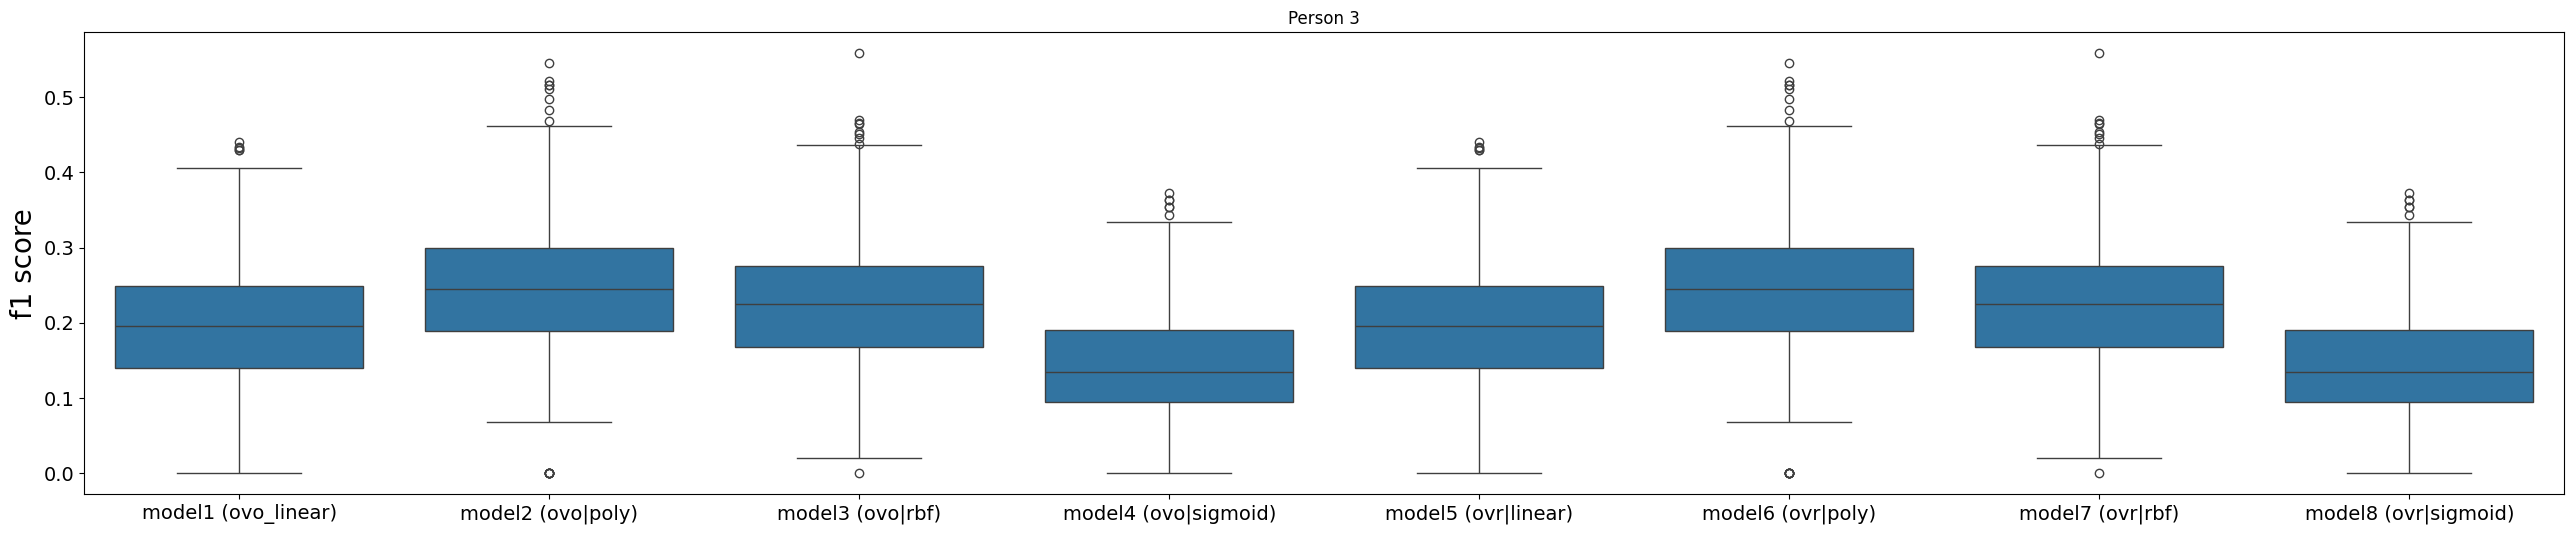

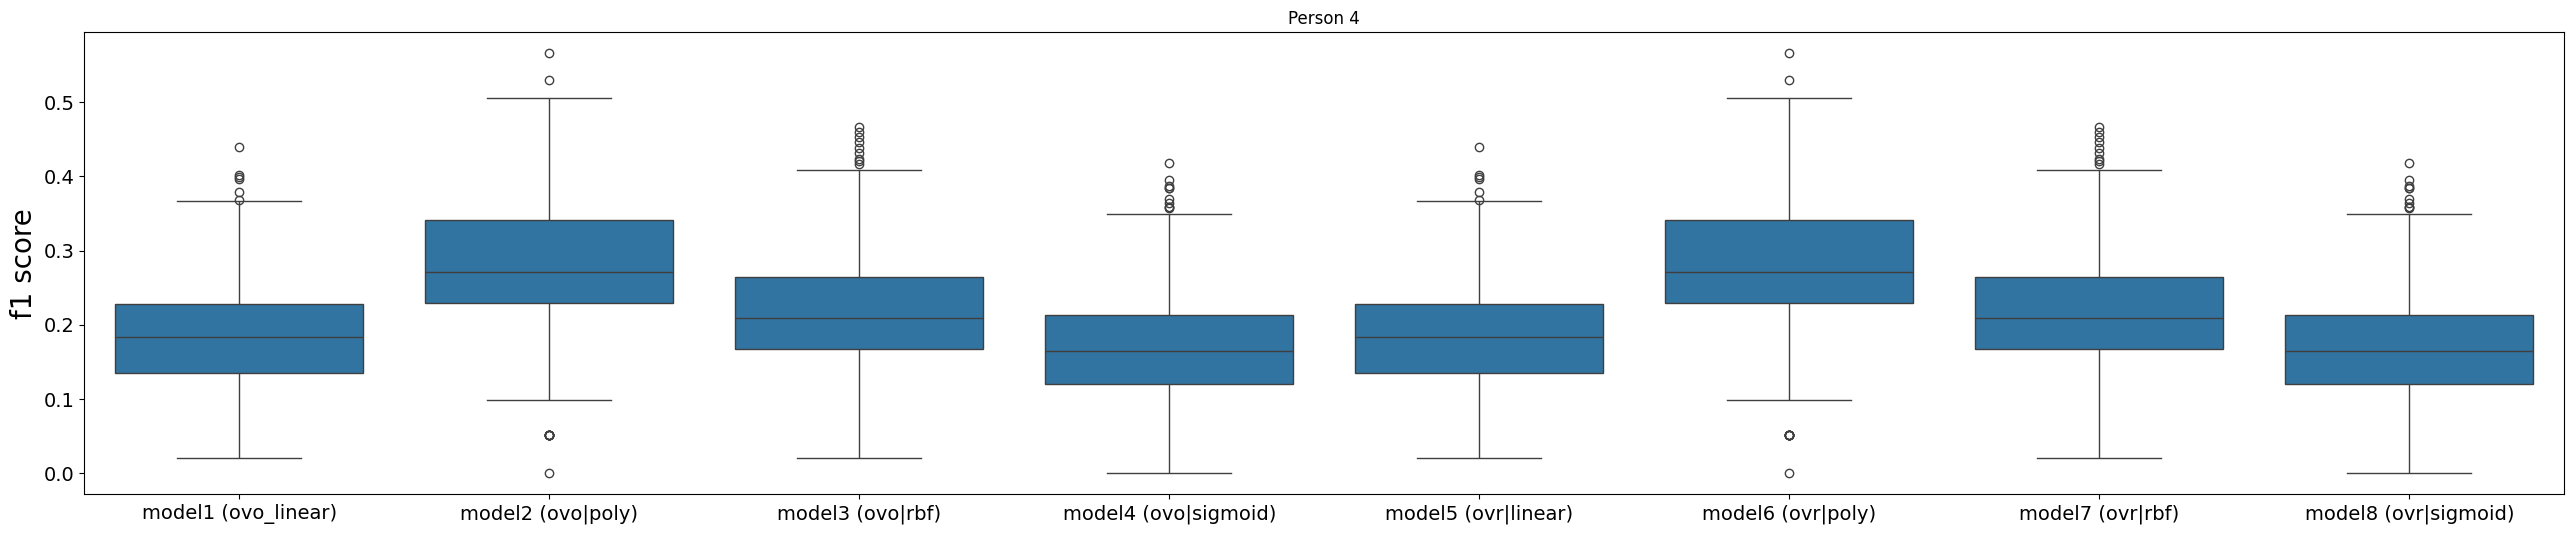

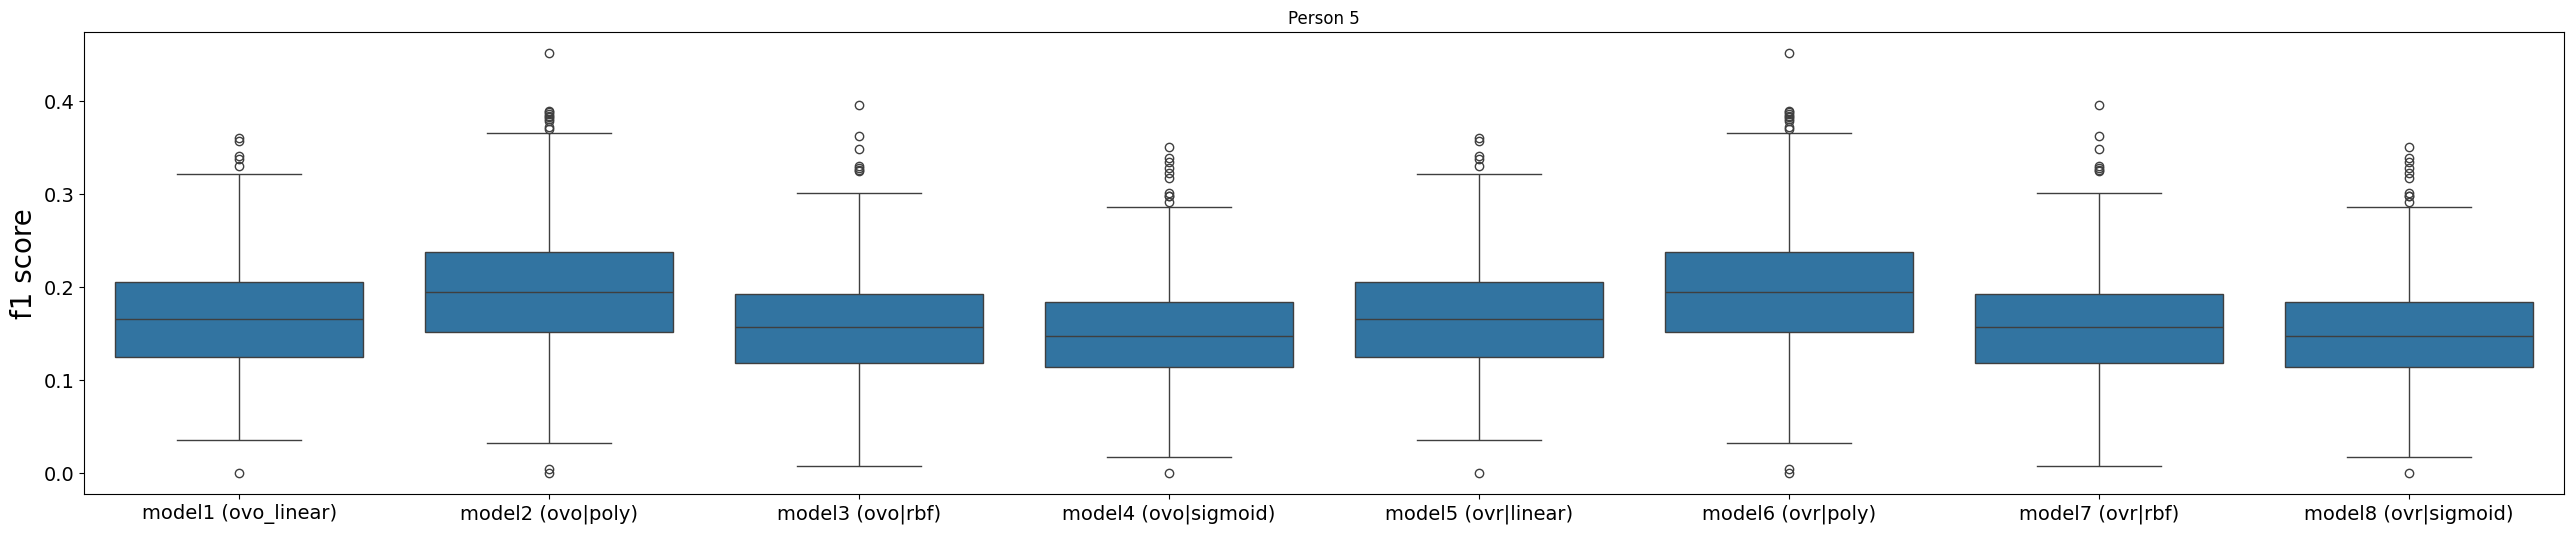

In [ ]:
for i_person in range(6):
    plt.figure(figsize=(32, 6))
    sns.boxplot(y=np.concatenate(all_boot_f1score_m1[i_person::6]),
                x= ['model1 (ovo_linear)'] * 1000  +  ['model2 (ovo|poly)'] * 1000  + ['model3 (ovo|rbf)'] * 1000  +  ['model4 (ovo|sigmoid)'] * 1000  +  ["model5 (ovr|linear)"] * 1000  +     ['model6 (ovr|poly)'] * 1000  +    ['model7 (ovr|rbf)'] * 1000  +  ['model8 (ovr|sigmoid)'] * 1000 )

    plt.ylabel("f1 score", size=20)
    plt.title(f"Person {i_person}")
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

### 6 AR

In [ ]:
file_ = myography_prosebaya_path = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_6AR.csv'
dataset = pd.read_csv(file_)

In [ ]:
all_boot_f1score_m1  = []
for decision_function_shape in ('ovo', 'ovr'):
    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        print(f'---- kernel - {kernel} | decision_function_shape - {decision_function_shape} ---- ')
        for i_person in range(6):

            X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
            X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
            y_train = python_obj[f'{i_person}']['y_train']
            y_test = np.array(python_obj[f'{i_person}']['y_test'])

            df = dataset.query(f'person_id == {i_person}')
            df.set_index("sector_id", inplace = True)
            a = df[columns_6]

            X_train = []
            for n in X_train_sectors:
                all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
                X_train.append(all.reshape(-1))

            X_test = []
            for n in  X_test_sectors:
                all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
                X_test.append(all.reshape(-1))

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            clf = SVC(kernel = kernel, decision_function_shape= decision_function_shape )
            clf.fit(X_train, y_train)
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes: 7*6/2 = 21

            clf.decision_function_shape = decision_function_shape
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes

            predicted = clf.predict(X_test)

            boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
            all_boot_f1score_m1.append(boot_f1score_m1)

            alpha = 0.10
            print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

---- kernel - linear | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.06467633 0.24875256]
Испытуемый 1: F1 score - [0.07839563 0.27462205]
Испытуемый 2: F1 score - [0.08808369 0.34727047]
Испытуемый 3: F1 score - [0.01428571 0.22883619]
Испытуемый 4: F1 score - [0.02834008 0.19435223]
Испытуемый 5: F1 score - [0.03912834 0.20292323]
---- kernel - poly | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.12706612 0.39622642]
Испытуемый 1: F1 score - [0.08567591 0.31339051]
Испытуемый 2: F1 score - [0.11947431 0.43548387]
Испытуемый 3: F1 score - [0.06845238 0.390625  ]
Испытуемый 4: F1 score - [0.14396285 0.40935673]
Испытуемый 5: F1 score - [0.08128544 0.3201581 ]
---- kernel - rbf | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.04796717 0.20991223]
Испытуемый 1: F1 score - [0.07228822 0.27418911]
Испытуемый 2: F1 score - [0.04030338 0.27011404]
Испытуемый 3: F1 score - [0.0594697  0.32572825]
Испытуемый 4: F1 score - [0.05414054 0.29978

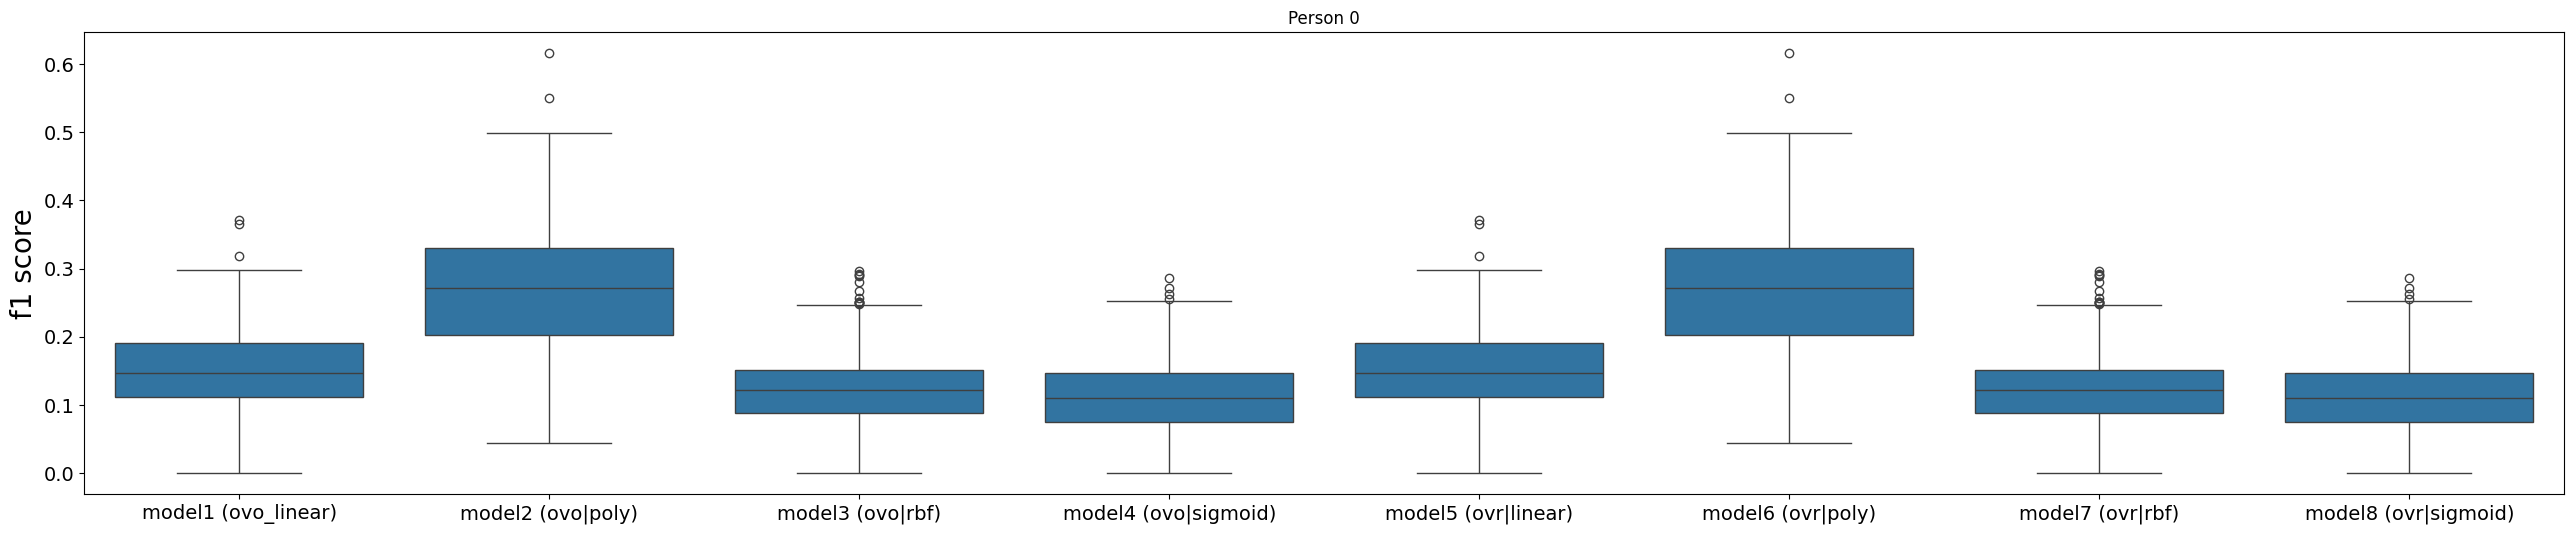

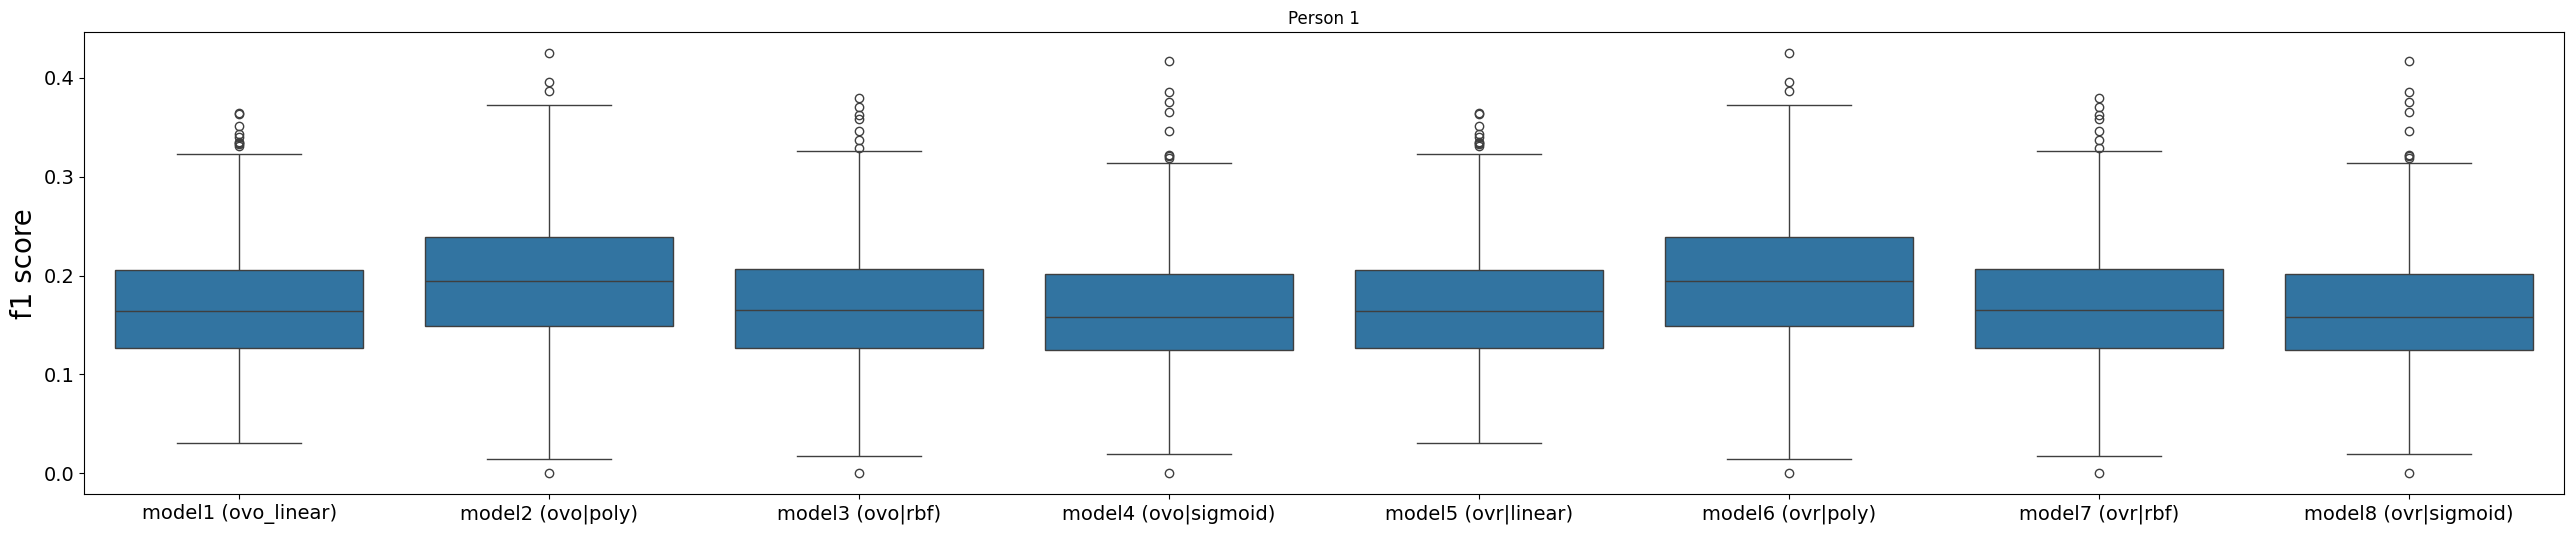

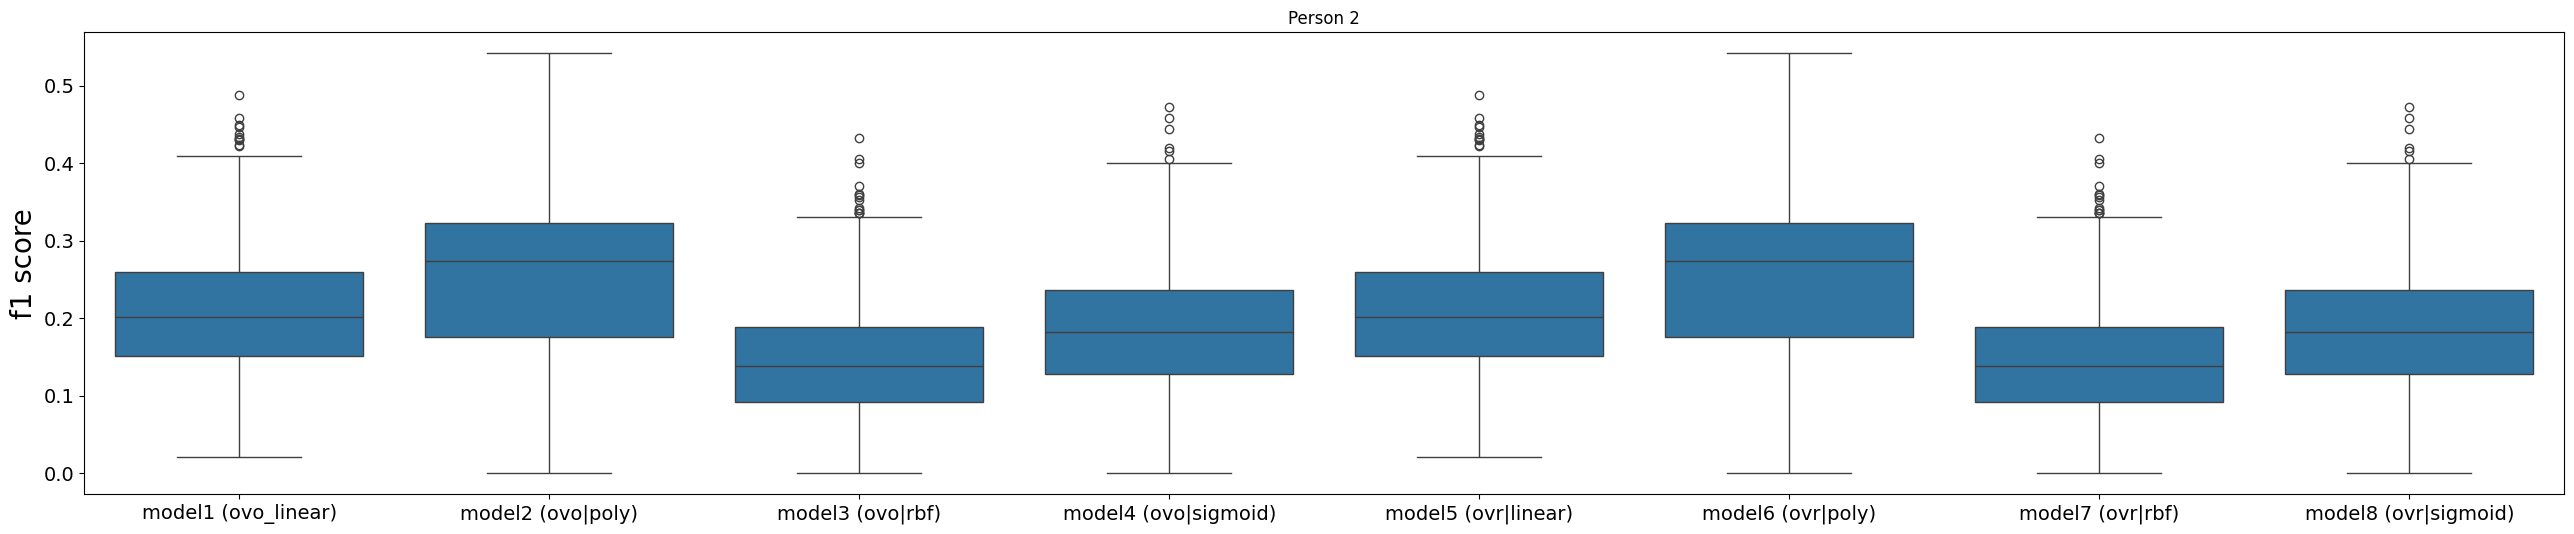

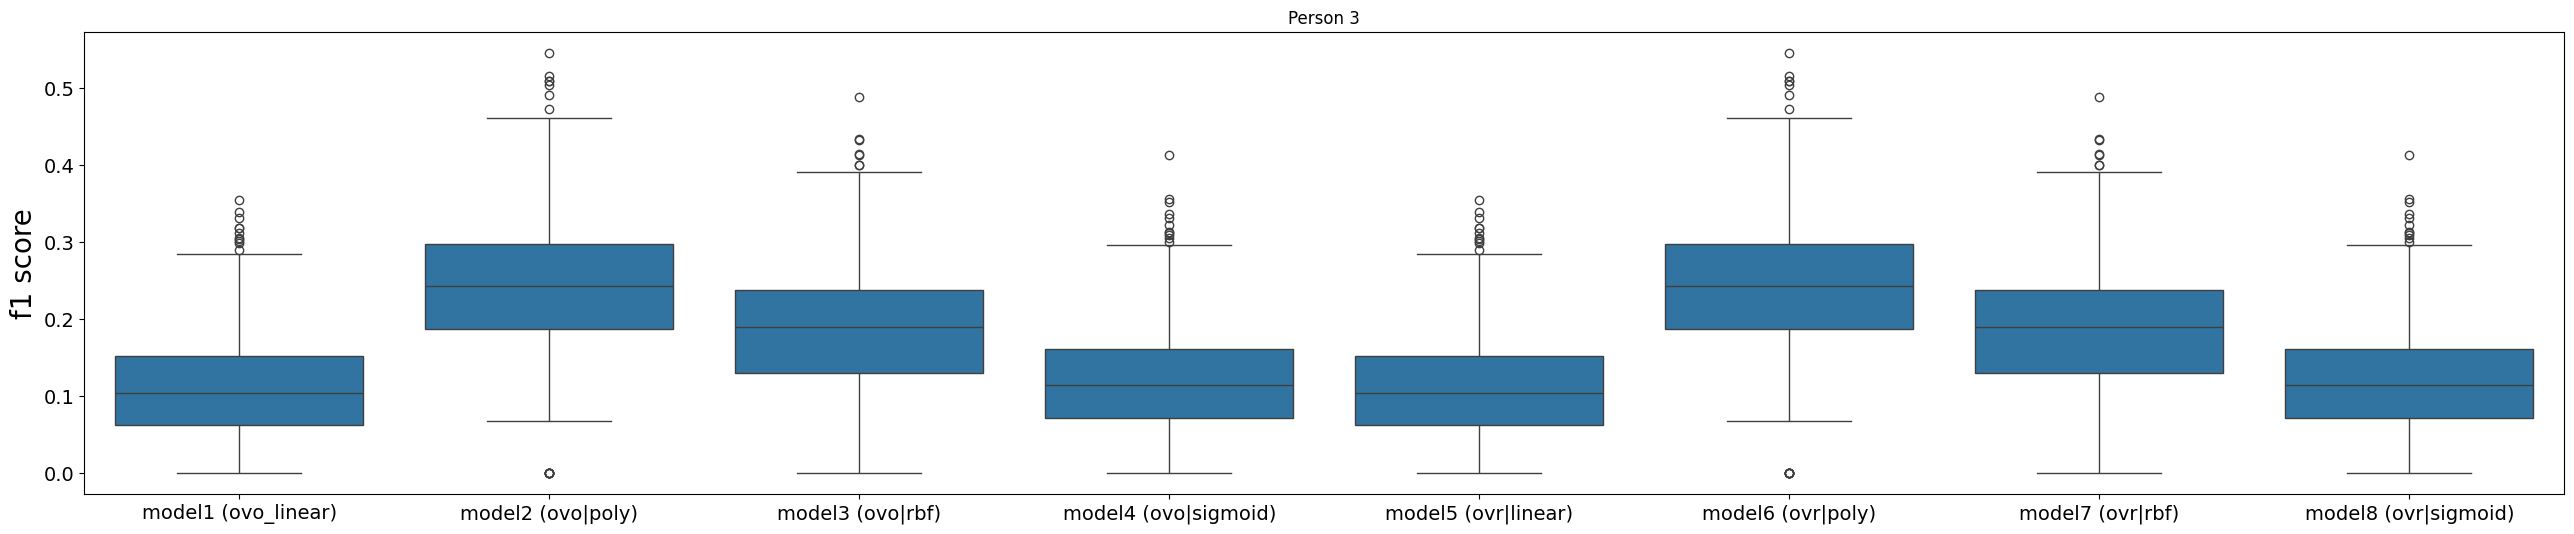

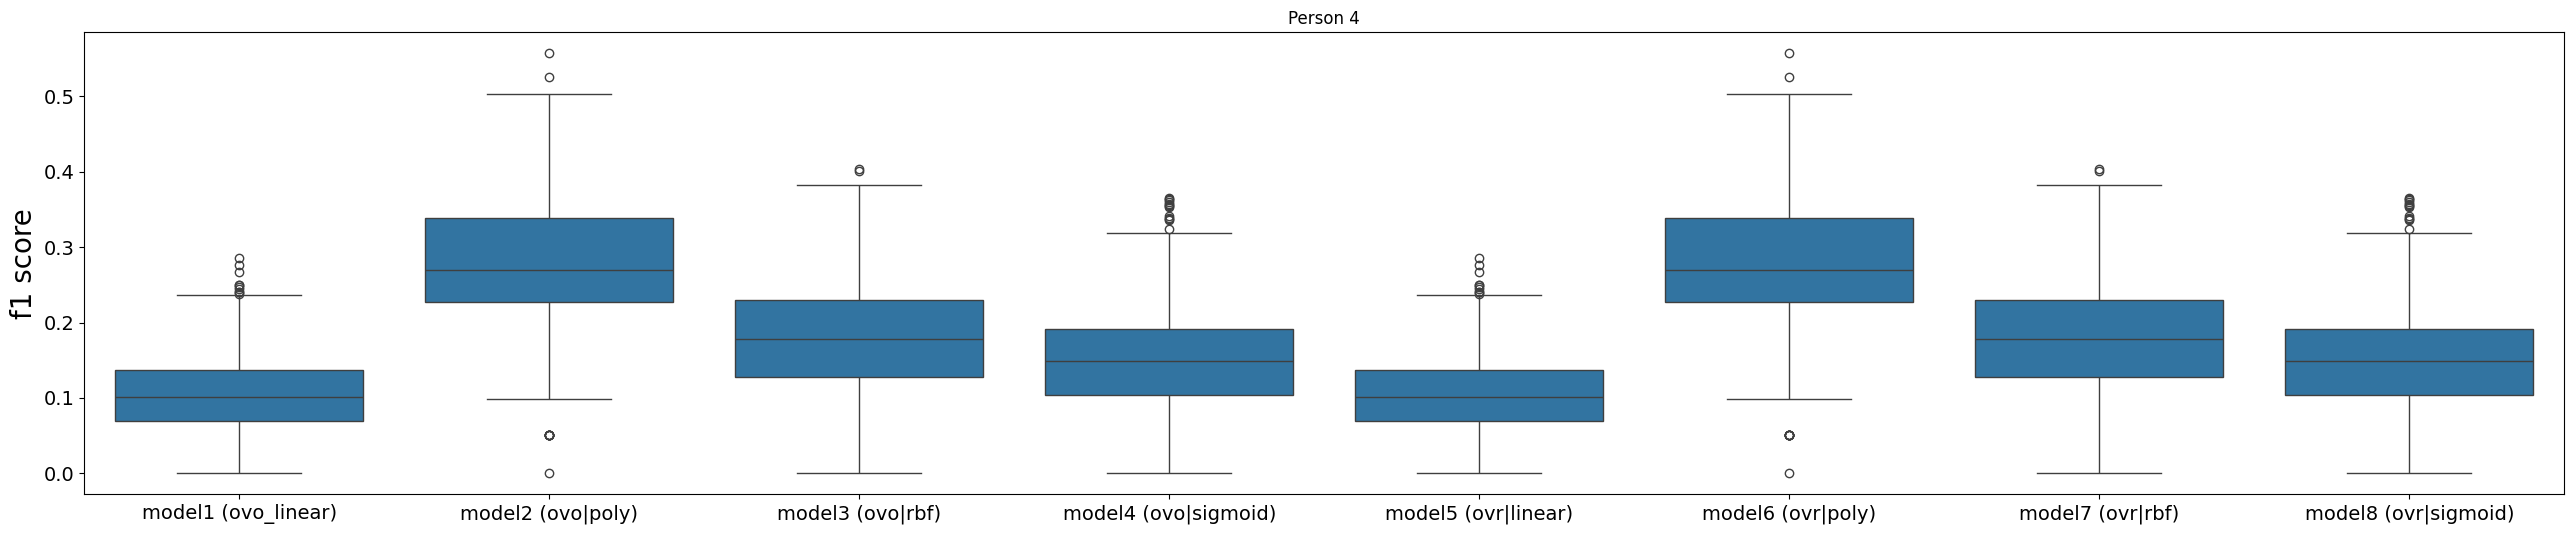

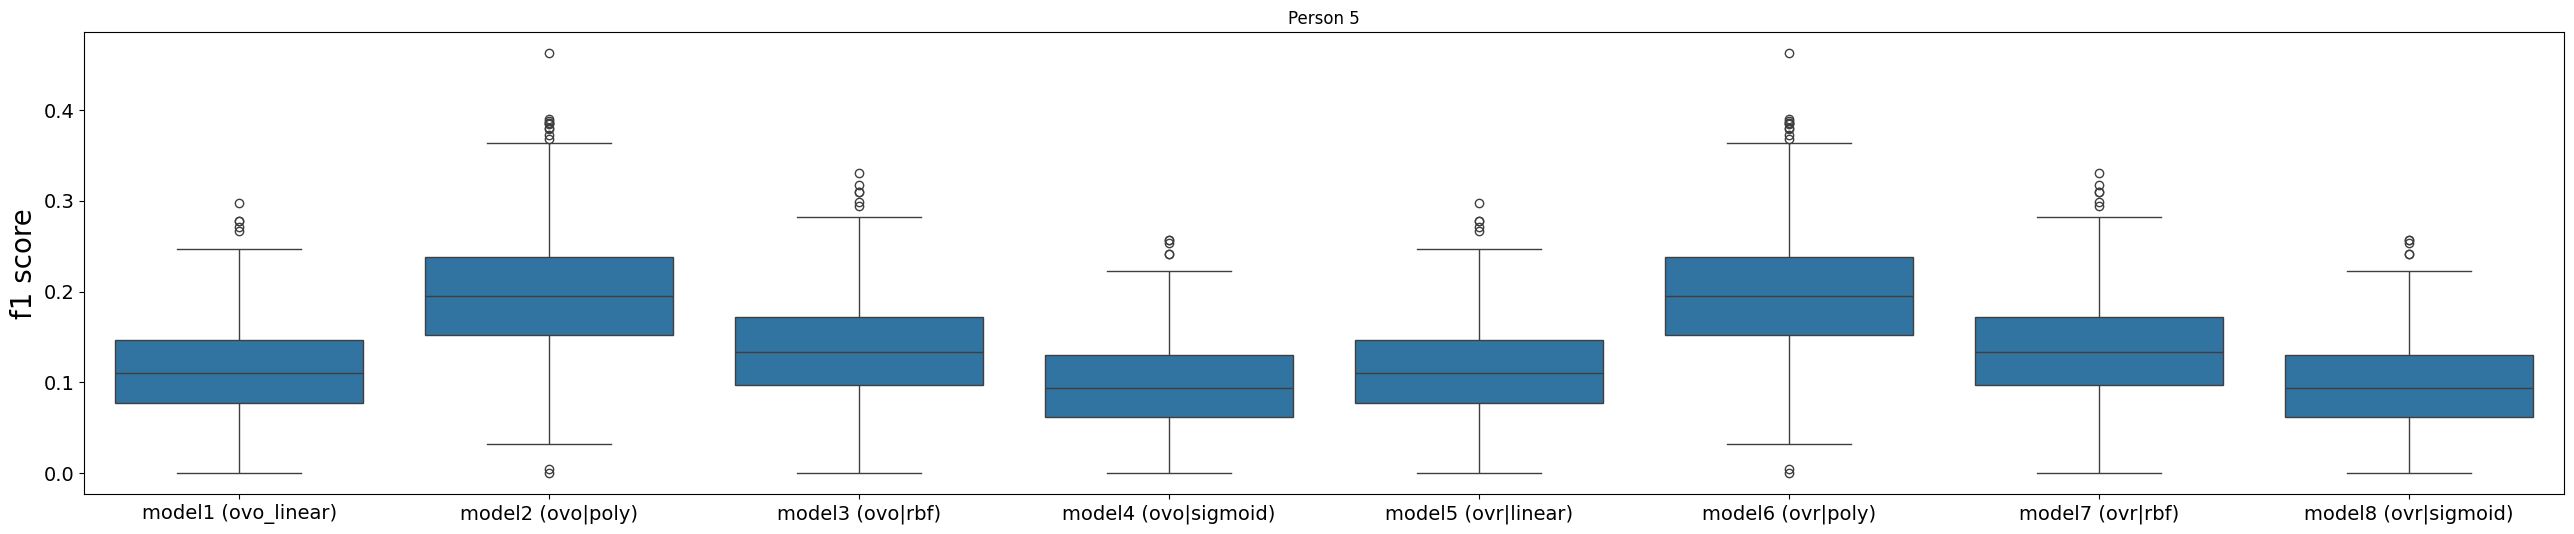

In [ ]:
import seaborn as sns

for i_person in range(6):
    plt.figure(figsize=(32, 6))
    sns.boxplot(y=np.concatenate(all_boot_f1score_m1[i_person::6]),
                x= ['model1 (ovo_linear)'] * 1000  +  ['model2 (ovo|poly)'] * 1000  + ['model3 (ovo|rbf)'] * 1000  +  ['model4 (ovo|sigmoid)'] * 1000  +  ["model5 (ovr|linear)"] * 1000  +     ['model6 (ovr|poly)'] * 1000  +    ['model7 (ovr|rbf)'] * 1000  +  ['model8 (ovr|sigmoid)'] * 1000 )

    plt.ylabel("f1 score", size=20)
    plt.title(f"Person {i_person}")
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

### 8 AR

In [ ]:
file_ = myography_prosebaya_path = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_8AR.csv'
dataset = pd.read_csv(file_)

In [ ]:
from sklearn.metrics import f1_score

all_boot_f1score_m1  = []
for decision_function_shape in ('ovo', 'ovr'):
    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        print(f'---- kernel - {kernel} | decision_function_shape - {decision_function_shape} ---- ')
        for i_person in range(6):

            X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
            X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
            y_train = python_obj[f'{i_person}']['y_train']
            y_test = np.array(python_obj[f'{i_person}']['y_test'])

            df = dataset.query(f'person_id == {i_person}')
            df.set_index("sector_id", inplace = True)
            a = df[columns_8]

            X_train = []
            for n in X_train_sectors:
                all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
                X_train.append(all.reshape(-1))

            X_test = []
            for n in  X_test_sectors:
                all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
                X_test.append(all.reshape(-1))

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            clf = SVC(kernel = kernel, decision_function_shape= decision_function_shape )
            clf.fit(X_train, y_train)
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes: 7*6/2 = 21

            clf.decision_function_shape = decision_function_shape
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes

            predicted = clf.predict(X_test)

            boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
            all_boot_f1score_m1.append(boot_f1score_m1)

            alpha = 0.10
            print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

---- kernel - linear | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.02651515 0.17735834]
Испытуемый 1: F1 score - [0.06531976 0.24500517]
Испытуемый 2: F1 score - [0.11801639 0.38042435]
Испытуемый 3: F1 score - [0.03964646 0.2762585 ]
Испытуемый 4: F1 score - [0.00909091 0.17631161]
Испытуемый 5: F1 score - [0.08745718 0.27224632]
---- kernel - poly | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.12747036 0.4       ]
Испытуемый 1: F1 score - [0.10188473 0.35028955]
Испытуемый 2: F1 score - [0.12121212 0.45      ]
Испытуемый 3: F1 score - [0.06868132 0.39705882]
Испытуемый 4: F1 score - [0.14542936 0.41433371]
Испытуемый 5: F1 score - [0.08333333 0.35714286]
---- kernel - rbf | decision_function_shape - ovo ---- 
Испытуемый 0: F1 score - [0.10814892 0.30457892]
Испытуемый 1: F1 score - [0.06670766 0.25990629]
Испытуемый 2: F1 score - [0.         0.27878977]
Испытуемый 3: F1 score - [0.09488379 0.36538811]
Испытуемый 4: F1 score - [0.07893291 0.31884

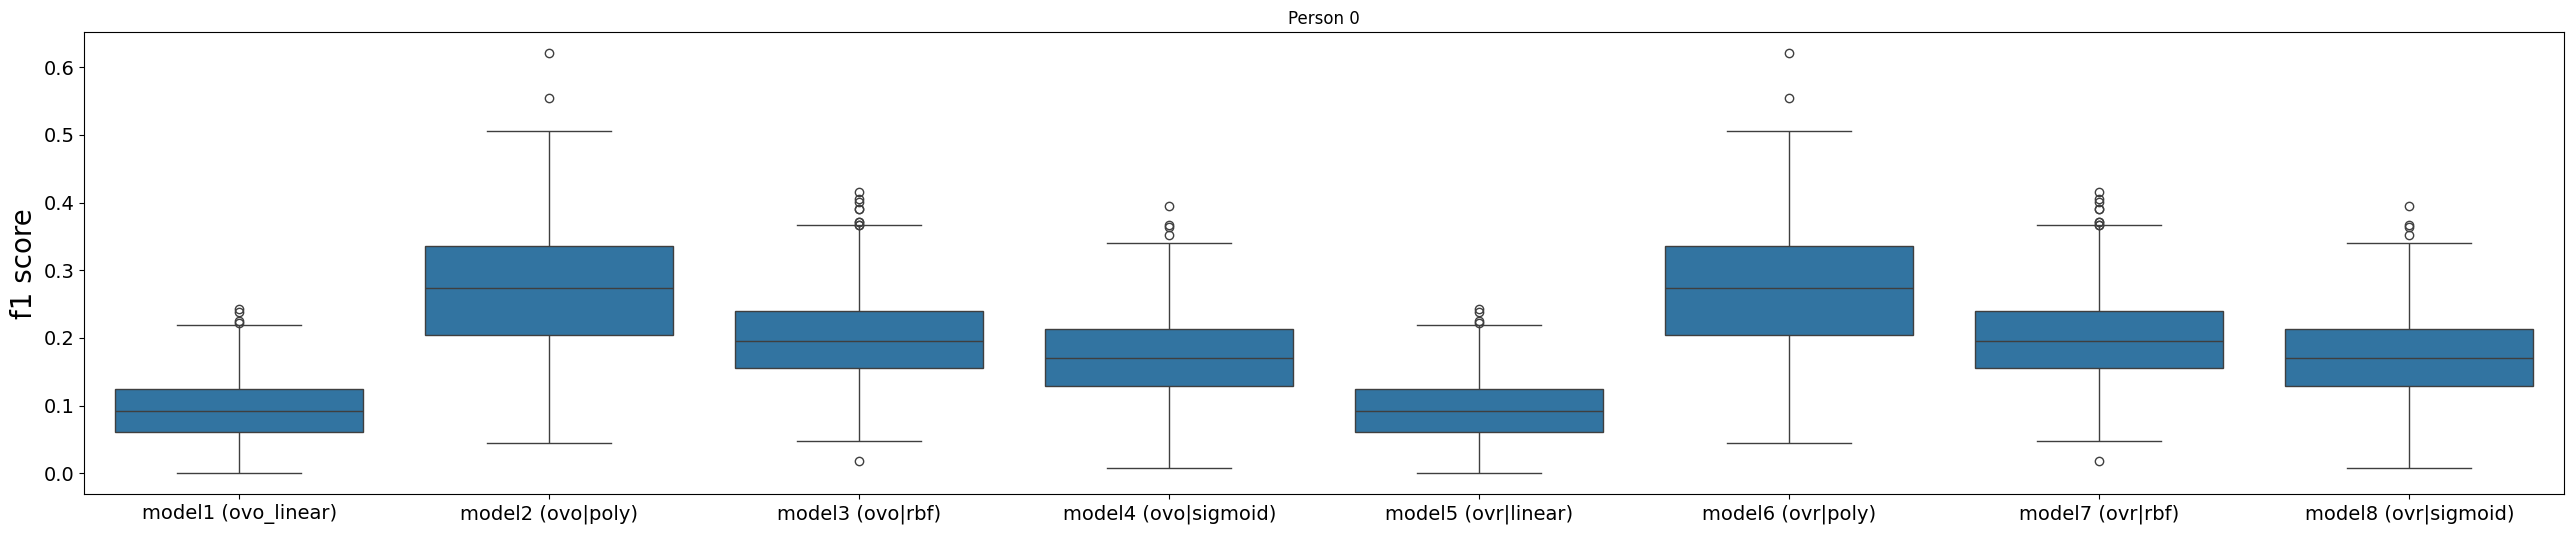

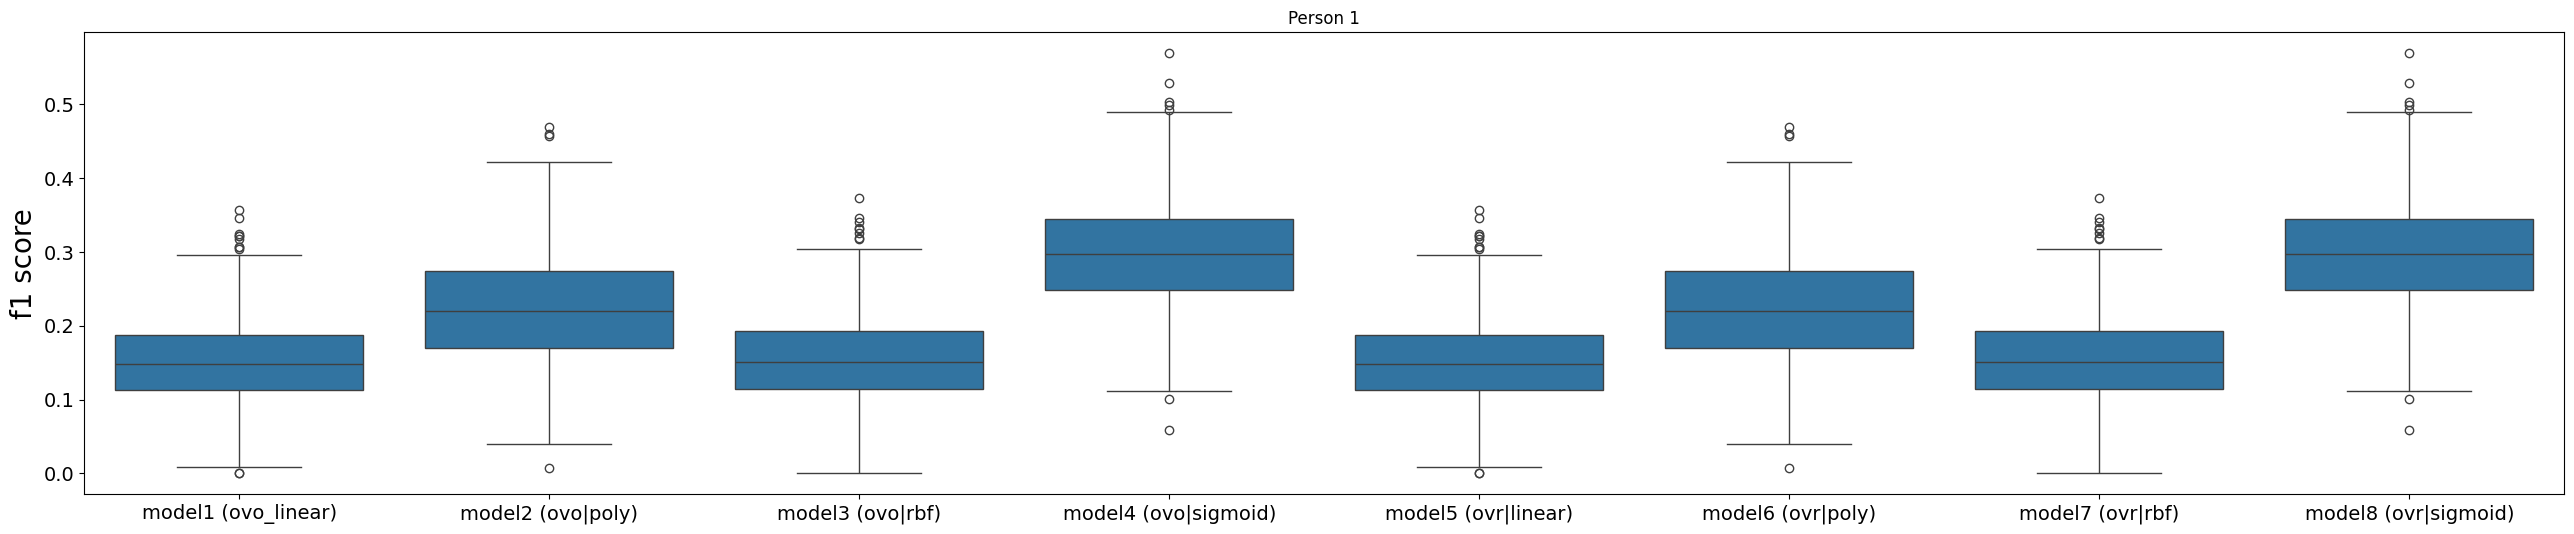

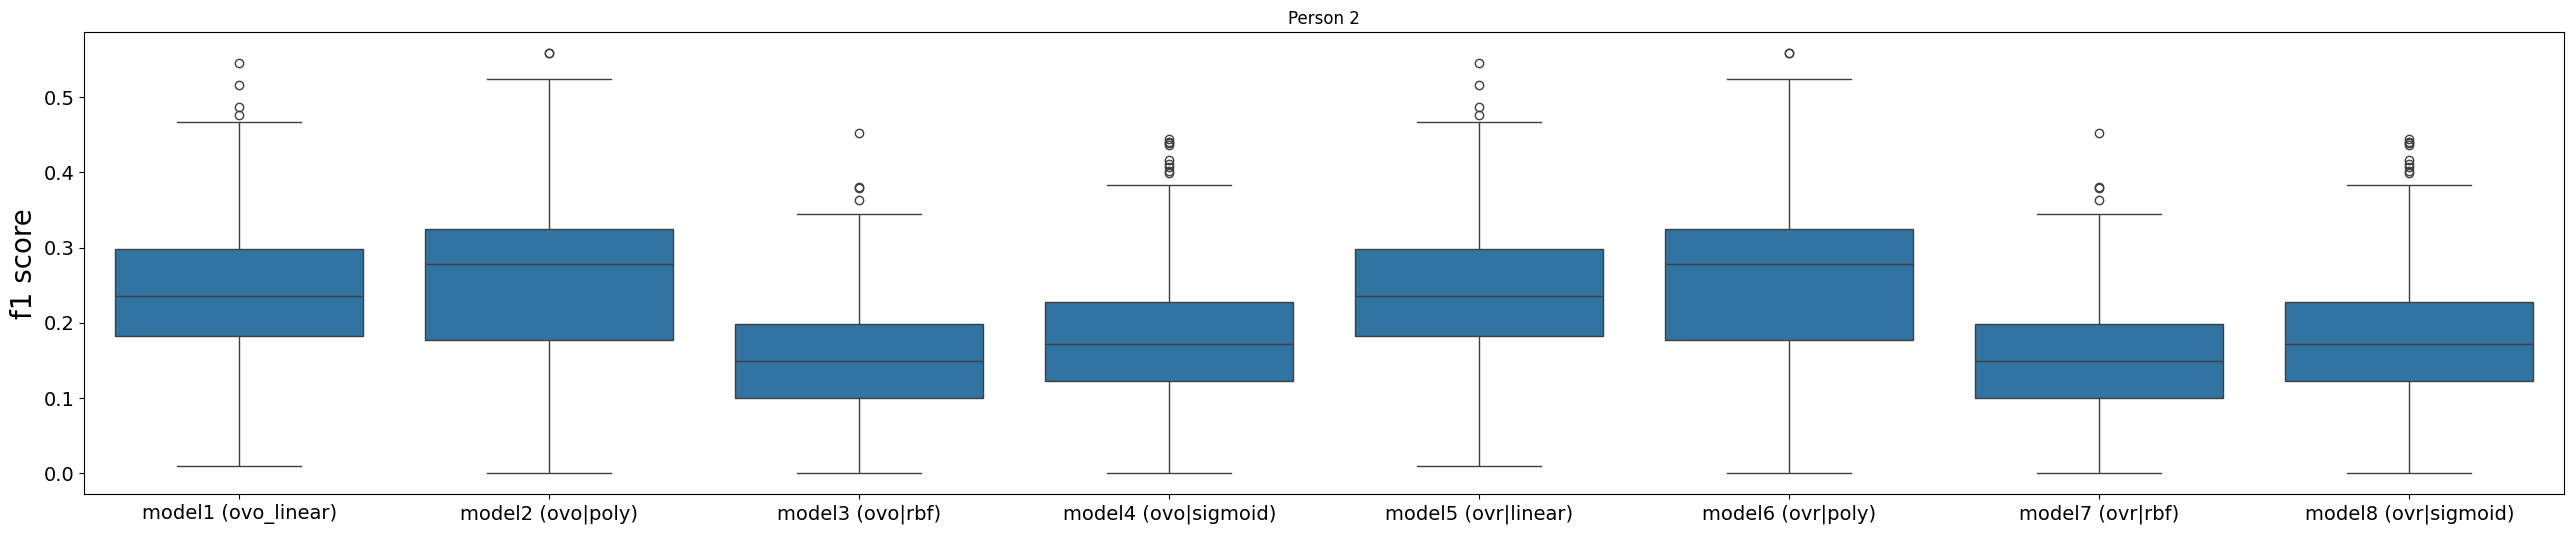

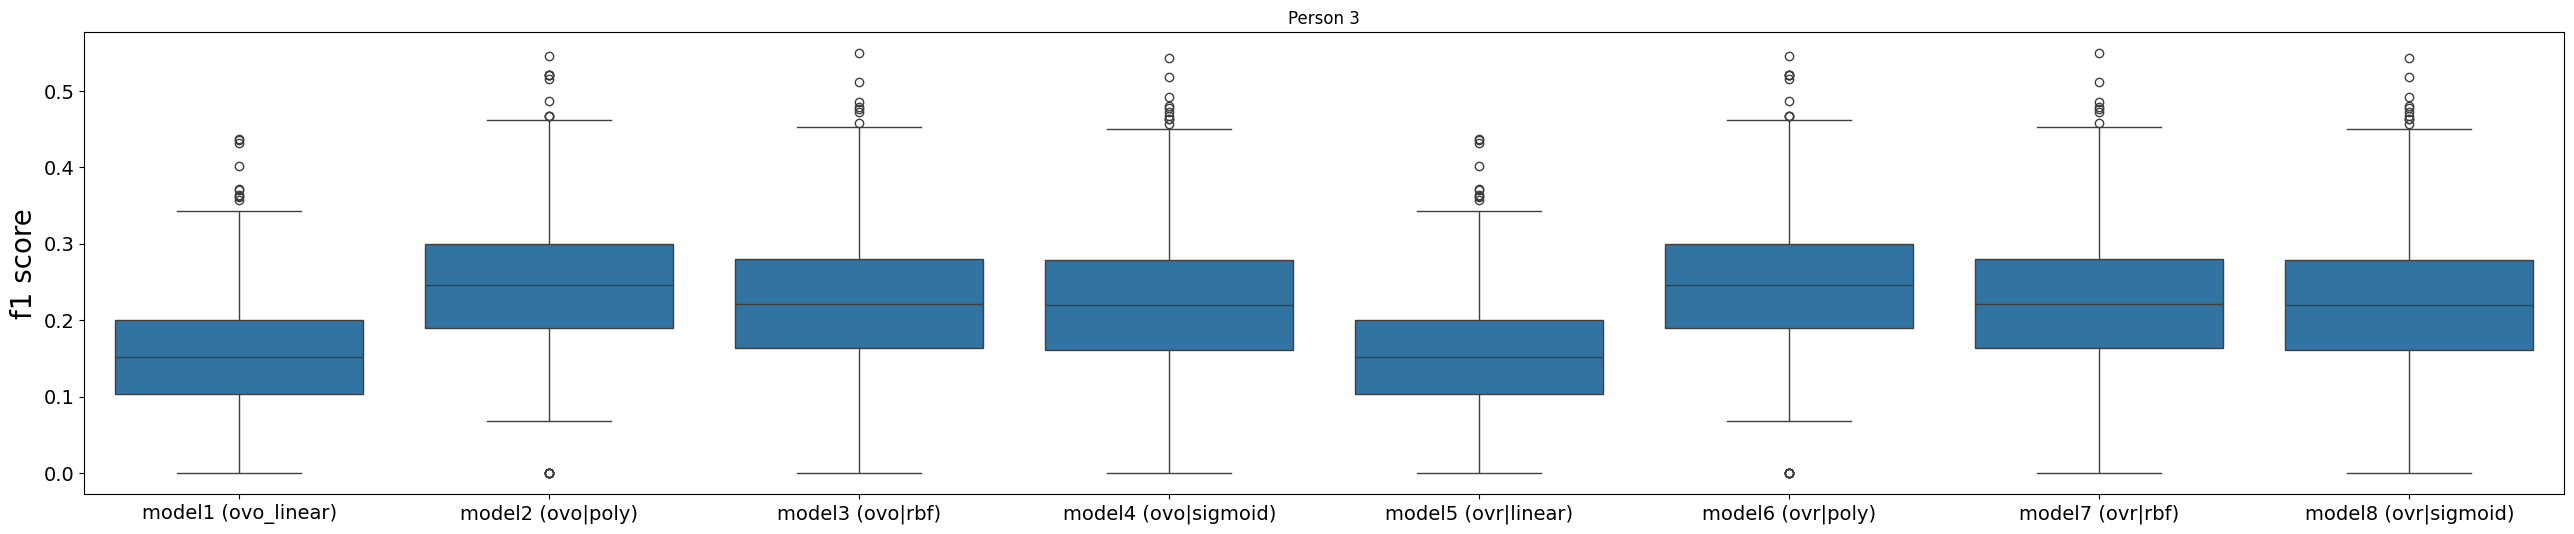

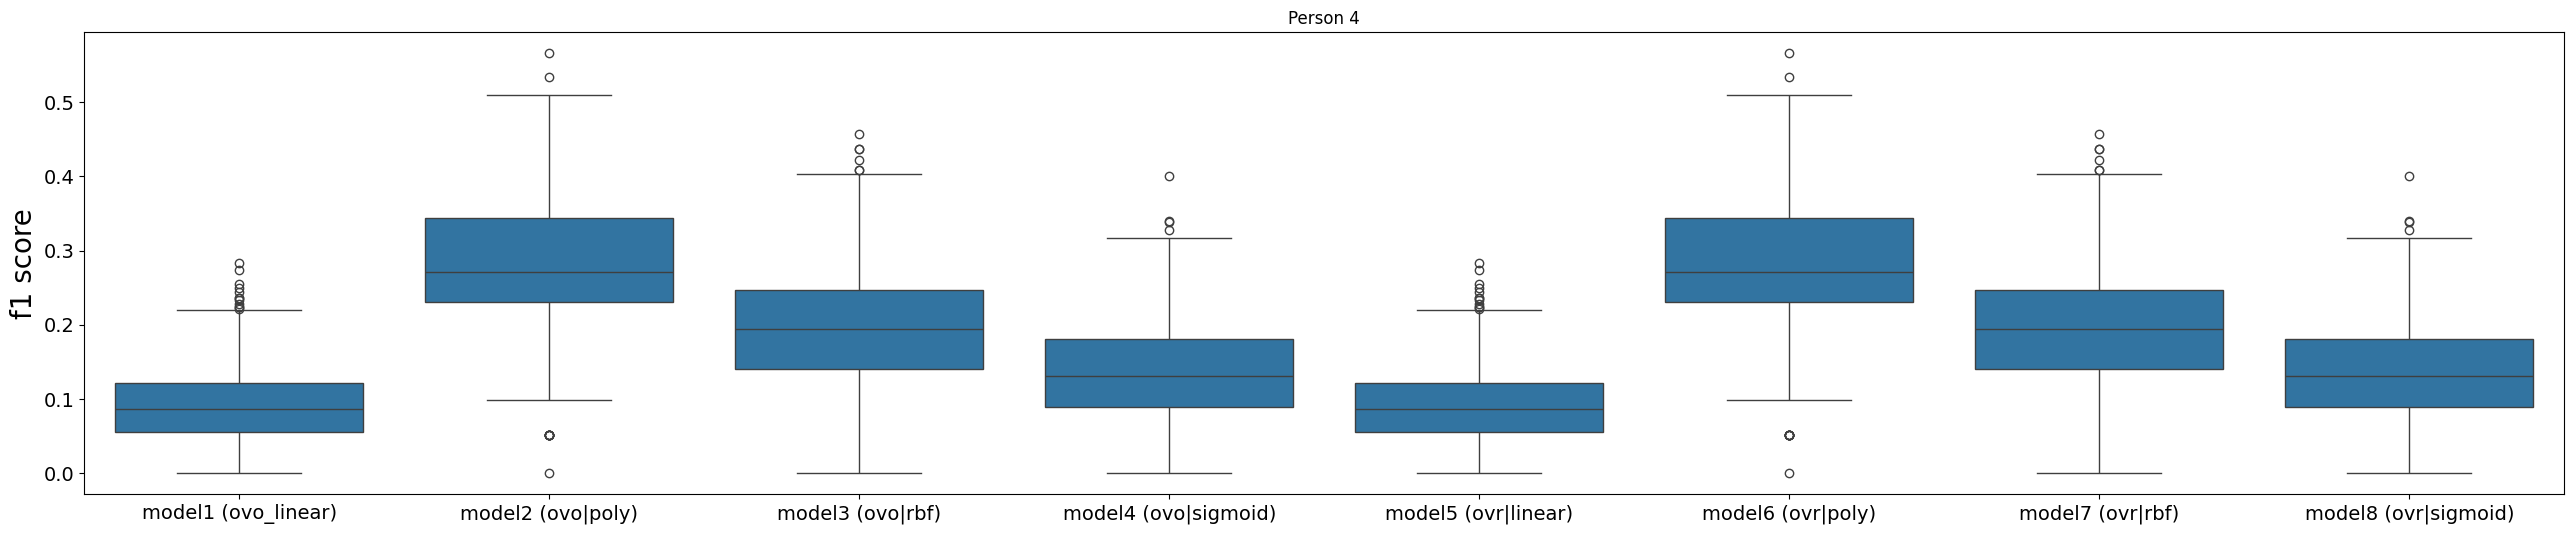

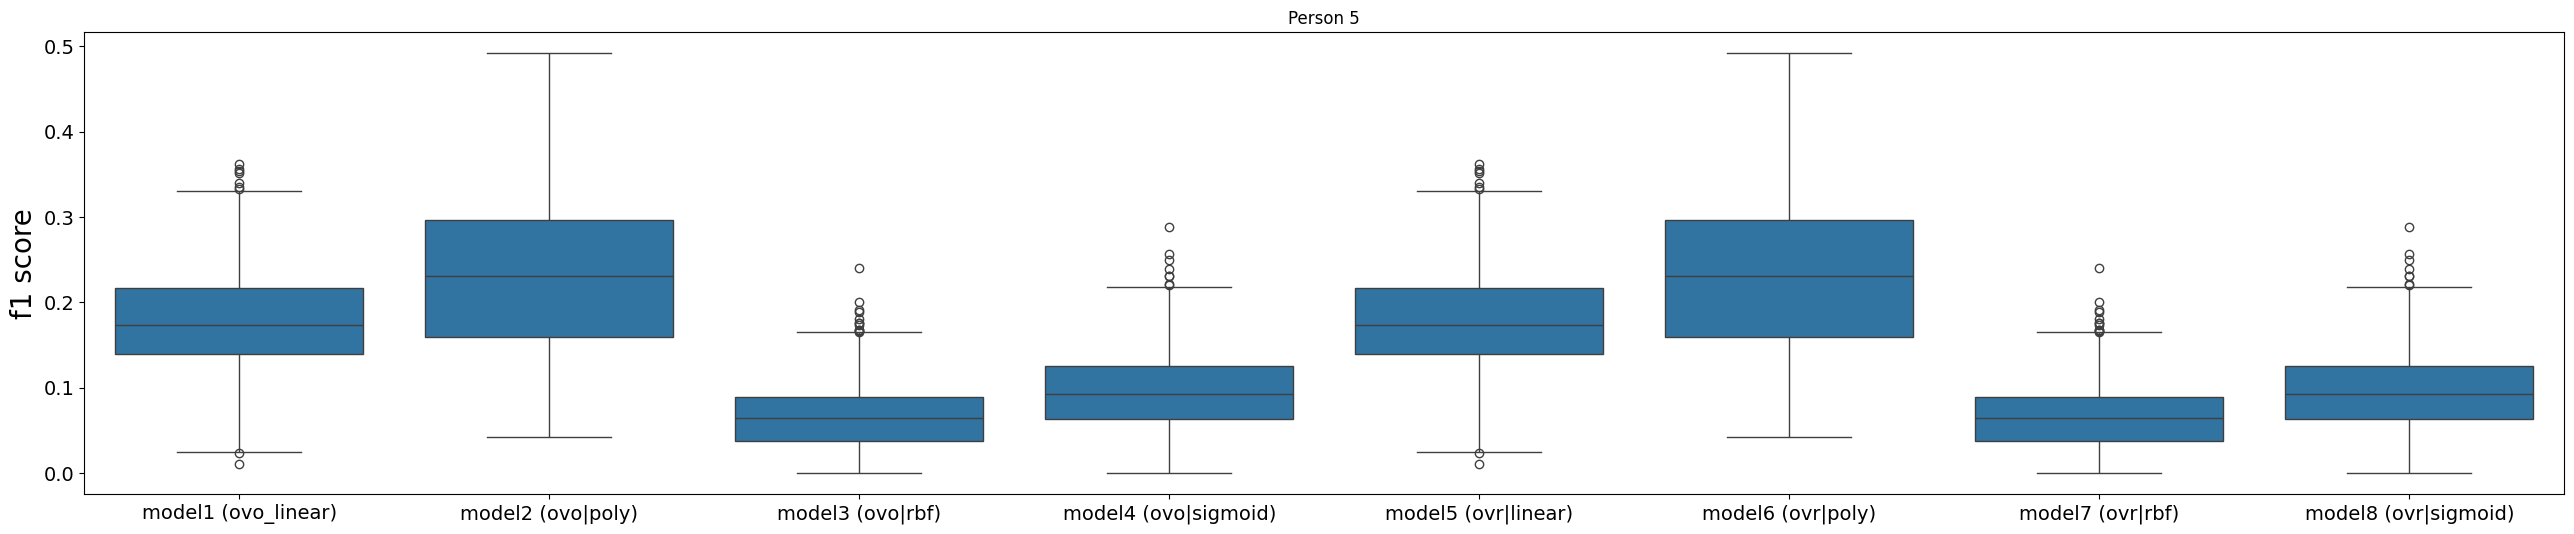

In [ ]:
for i_person in range(6):
    plt.figure(figsize=(32, 6))
    sns.boxplot(y=np.concatenate(all_boot_f1score_m1[i_person::6]),
                x= ['model1 (ovo_linear)'] * 1000  +  ['model2 (ovo|poly)'] * 1000  + ['model3 (ovo|rbf)'] * 1000  +  ['model4 (ovo|sigmoid)'] * 1000  +  ["model5 (ovr|linear)"] * 1000  +     ['model6 (ovr|poly)'] * 1000  +    ['model7 (ovr|rbf)'] * 1000  +  ['model8 (ovr|sigmoid)'] * 1000 )

    plt.ylabel("f1 score", size=20)
    plt.title(f"Person {i_person}")
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

## SVM Poli

### OPTUNA

In [ ]:
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
i_person = 2

X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
y_train = python_obj[f'{i_person}']['y_train']
y_test = np.array(python_obj[f'{i_person}']['y_test'])

df = dataset.query(f'person_id == {i_person}')
df.set_index("sector_id", inplace = True)
a = df[columns_6]

X_train = []
for n in X_train_sectors:
    all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
    X_train.append(all.reshape(-1))

X_test = []
for n in  X_test_sectors:
    all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
    X_test.append(all.reshape(-1))

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import optuna
from optuna.samplers import RandomSampler

In [ ]:
# Define function which will optimized
def objective(trial):
    # boundaries for the optimizer's

    C = trial.suggest_float("C", 0.2, 2.5, step = 0.1)
    degree = trial.suggest_int("degree", 1, 6, step = 1)
    gamma = trial.suggest_float("gamma", 0.0005, 0.05, step = 0.005)

    # create new model(and all parameters) every iteration
    scaler = StandardScaler()
    x_train = scaler.fit_transform(X_train)
    x_test = scaler.transform(X_test)

    clf = SVC(kernel = 'poly',
              decision_function_shape = 'ovo',
              C = C,
              degree = degree,
              gamma = gamma,
              )
    clf.fit(x_train, y_train)
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes: 7*6/2 = 21

    clf.decision_function_shape = 'ovo'
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes

    predicted = clf.predict(x_test)

    boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
    return boot_f1score_m1.mean()


In [ ]:
# Create "exploration"
study = optuna.create_study(
    direction="maximize", study_name="Optimizer", sampler=RandomSampler(42)
)

study.optimize(
    objective, n_trials=100
)  # The more iterations, the higher the chances of catching the most optimal hyperparameters

[I 2023-11-21 13:42:27,516] A new study created in memory with name: Optimizer
[I 2023-11-21 13:42:31,311] Trial 0 finished with value: 0.2165764660054133 and parameters: {'C': 1.0, 'degree': 6, 'gamma': 0.035500000000000004}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:34,033] Trial 1 finished with value: 0.2076612317455723 and parameters: {'C': 1.6, 'degree': 1, 'gamma': 0.0055}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:35,903] Trial 2 finished with value: 0.2165764660054133 and parameters: {'C': 0.30000000000000004, 'degree': 6, 'gamma': 0.0305}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:37,101] Trial 3 finished with value: 0.17434533756687956 and parameters: {'C': 1.8, 'degree': 1, 'gamma': 0.0455}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:38,318] Trial 4 finished with value: 0.24193598535207533 and parameters: {'C': 2.1, 'degree': 2, 'gamma': 0.0055}. Best is trial 4 with value:

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
params = ["C", "degree", "gamma"]
optuna.visualization.plot_slice(study, params=params, target_name="f1_score")

In [ ]:
study.best_params

In [ ]:
def mySVCpoly(X_train, X_test, y_train, best_params):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(X_train)
    x_test = scaler.transform(X_test)

    clf = SVC(kernel = "poly",
              decision_function_shape = best_params['decision_function_shape'],
              C = best_params['C'],
              degree = best_params['degree'],
              gamma = best_params['gamma'],
              )
    clf.fit(x_train, y_train)
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes: 7*6/2 = 21

    clf.decision_function_shape = best_params['decision_function_shape']
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes

    return clf.predict(x_test)

In [ ]:
def get_all_boot_f1score_m1(columns_ , file_):

    dataset = pd.read_csv(file_)

    all_boot_f1score_m1 = []

    for i_person in range(6):
        X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
        X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
        y_train = python_obj[f'{i_person}']['y_train']
        y_test = np.array(python_obj[f'{i_person}']['y_test'])

        df = dataset.query(f'person_id == {i_person}')
        df.set_index("sector_id", inplace = True)
        a = df[columns_]

        X_train = []
        for n in X_train_sectors:
            all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
            X_train.append(all.reshape(-1))

        X_test = []
        for n in  X_test_sectors:
            all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
            X_test.append(all.reshape(-1))

        best_params = {'decision_function_shape': 'ovr', 'C': 2, 'degree': 3, 'gamma': 0.01}

        predicted = mySVCpoly(X_train, X_test,  y_train, best_params )

        boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
        all_boot_f1score_m1.append(boot_f1score_m1)

        alpha = 0.10
        print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')
    return all_boot_f1score_m1

### EEG_EMG_DTW_4AR

In [ ]:
all_boot_f1score_EEG_EMG_DTW_4AR = get_all_boot_f1score_m1(columns_4, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_4AR.csv')

Испытуемый 0: F1 score - [0.11073413 0.33307163]
Испытуемый 1: F1 score - [0.04025433 0.2303168 ]
Испытуемый 2: F1 score - [0.0712596  0.34414747]
Испытуемый 3: F1 score - [0.06818182 0.38709677]
Испытуемый 4: F1 score - [0.03878116 0.24832607]
Испытуемый 5: F1 score - [0.03186407 0.19908467]


In [ ]:
print('EEG_EMG_DTW_4AR')

data = all_boot_f1score_EEG_EMG_DTW_4AR

print(f'Person MEAN: {[round(round(np.mean(i), 3)*100,1) for i in data]}')
print(f'MEAN: {np.mean([round(round(np.mean(i), 3)*100,1) for i in data])}')

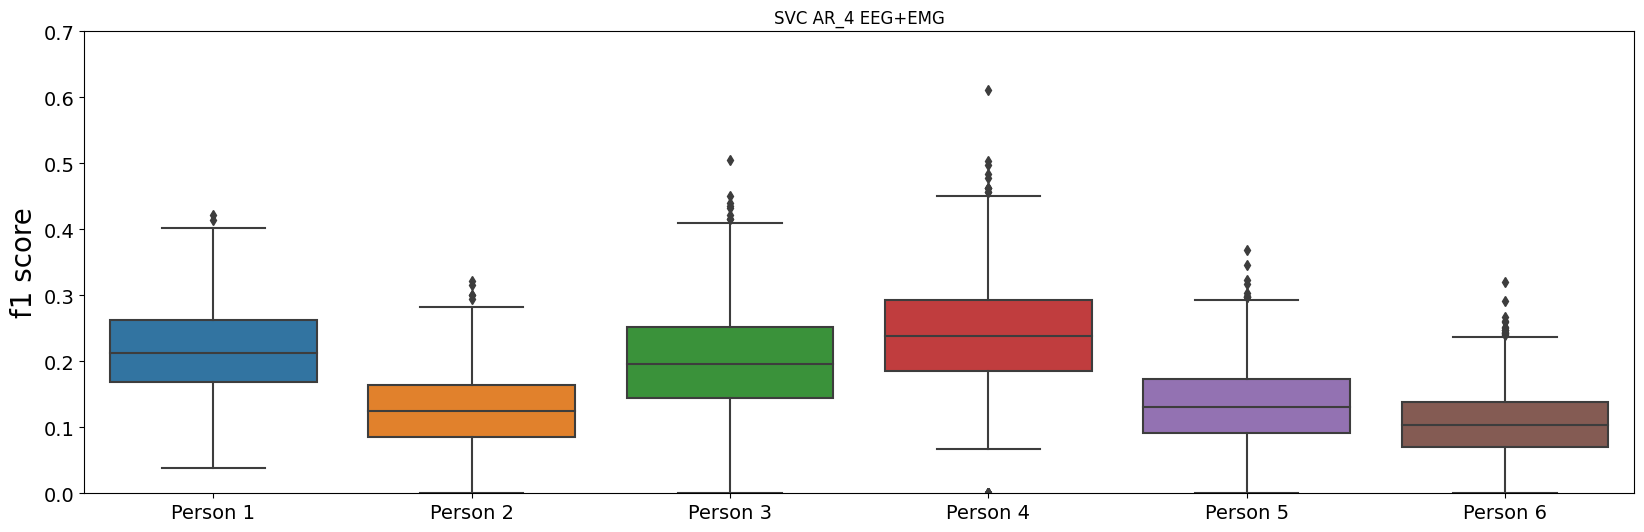

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_EMG_DTW_4AR ),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_4 EEG+EMG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### EEG_EMG_DTW_6AR

In [ ]:
all_boot_f1score_EEG_EMG_DTW_6AR = get_all_boot_f1score_m1(columns_6, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_6AR.csv')

Испытуемый 0: F1 score - [0.11583953 0.35836407]
Испытуемый 1: F1 score - [0.07724488 0.29193461]
Испытуемый 2: F1 score - [0.0591281  0.34260289]
Испытуемый 3: F1 score - [0.06011905 0.3175873 ]
Испытуемый 4: F1 score - [0.07635284 0.30658866]
Испытуемый 5: F1 score - [0.05838509 0.26267494]


In [ ]:
print('EEG_EMG_DTW_6AR')

data = all_boot_f1score_EEG_EMG_DTW_6AR

print(f'Person MEAN: {[round(round(np.mean(i), 3)*100,1) for i in data]}')
print(f'MEAN: {np.mean([round(round(np.mean(i), 3)*100,1) for i in data])}')

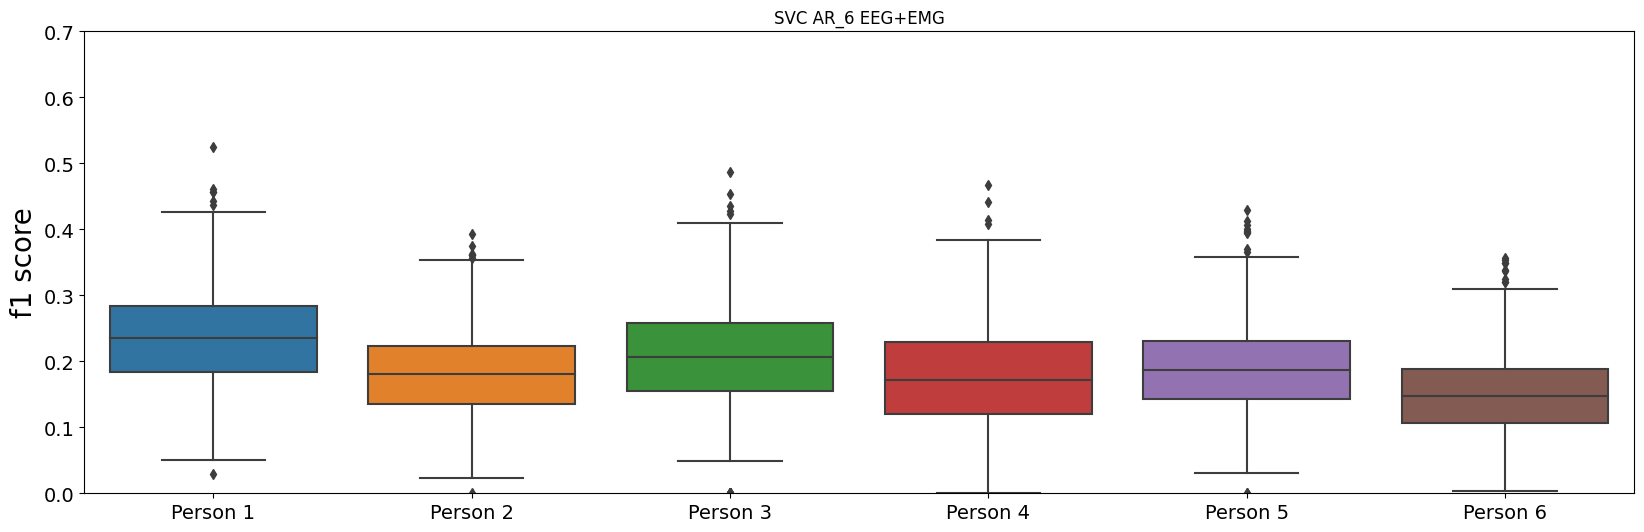

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_EMG_DTW_6AR ),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_6 EEG+EMG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### EEG_EMG_DTW_8AR

In [ ]:
all_boot_f1score_EEG_EMG_DTW_8AR = get_all_boot_f1score_m1(columns_8, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_8AR.csv')

Испытуемый 0: F1 score - [0.05690156 0.25231961]
Испытуемый 1: F1 score - [0.06167749 0.26490596]
Испытуемый 2: F1 score - [0.0552765  0.31880169]
Испытуемый 3: F1 score - [0.06119898 0.32512315]
Испытуемый 4: F1 score - [0.07957377 0.29995493]
Испытуемый 5: F1 score - [0.03655648 0.2393604 ]


In [ ]:
print('EEG_EMG_DTW_8AR')

data = all_boot_f1score_EEG_EMG_DTW_8AR

print(f'Person MEAN: {[round(round(np.mean(i), 3)*100,1) for i in data]}')
print(f'MEAN: {np.mean([round(round(np.mean(i), 3)*100,1) for i in data])}')

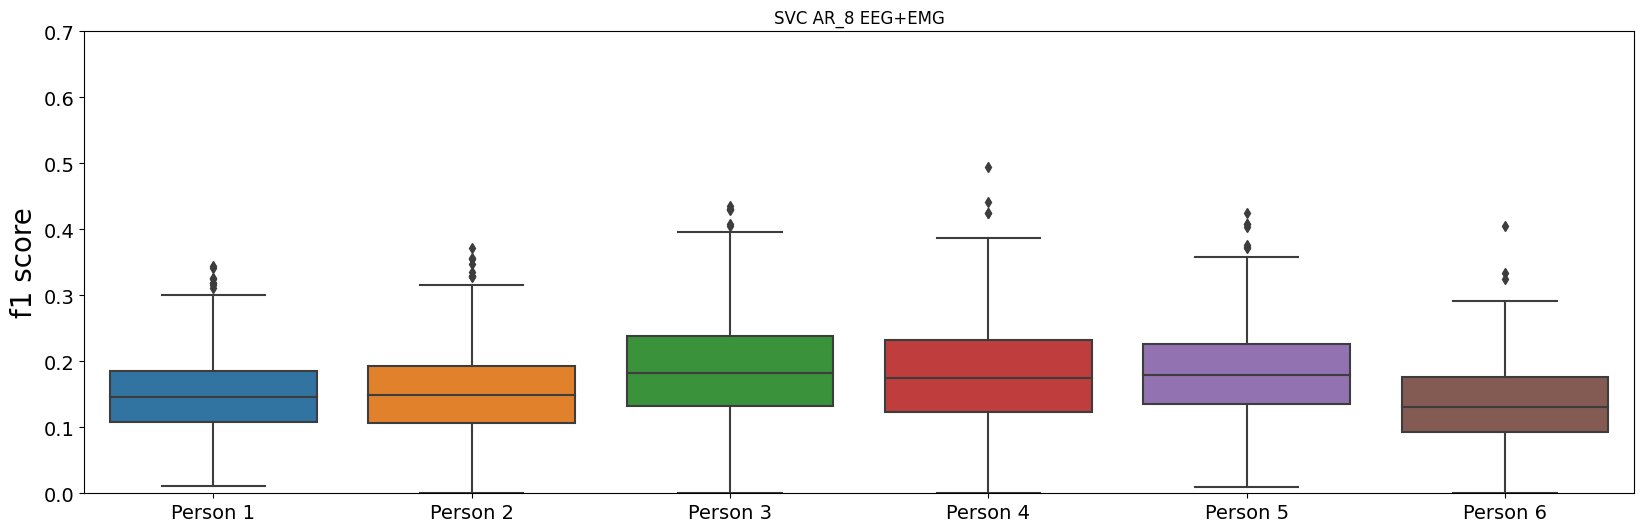

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_EMG_DTW_8AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +  ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_8 EEG+EMG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### EEG_DTW_4AR

In [ ]:
all_boot_f1score_EEG_DTW_4AR = get_all_boot_f1score_m1(columns_4, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_DTW_4AR.csv')

Испытуемый 0: F1 score - [0.14831081 0.38793195]
Испытуемый 1: F1 score - [0.04038919 0.23386107]
Испытуемый 2: F1 score - [0.07316413 0.35582297]
Испытуемый 3: F1 score - [0.06857143 0.39393939]
Испытуемый 4: F1 score - [0.05192669 0.26074428]
Испытуемый 5: F1 score - [0.10729982 0.33957324]


In [ ]:
print('EEG_DTW_4AR')

data = all_boot_f1score_EEG_DTW_4AR

print(f'Person MEAN: {[round(round(np.mean(i), 3)*100,1) for i in data]}')
print(f'MEAN: {np.mean([round(round(np.mean(i), 3)*100,1) for i in data])}')

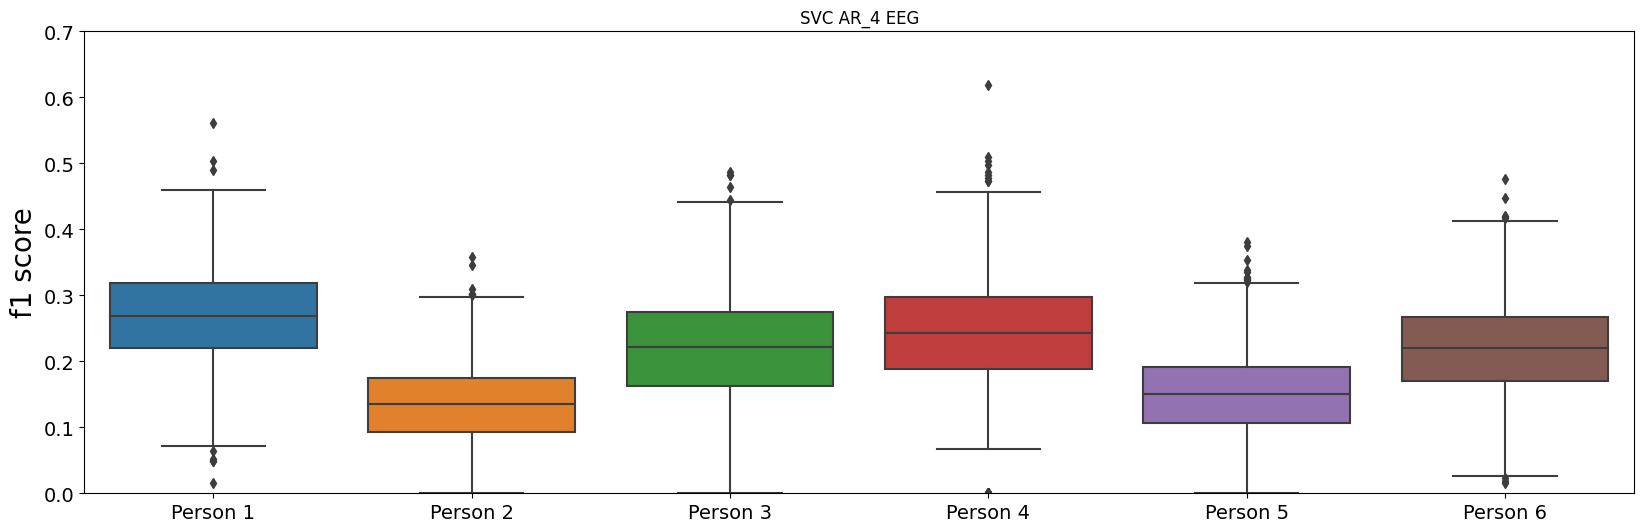

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_DTW_4AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_4 EEG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### EEG_DTW_6AR

In [ ]:
all_boot_f1score_EEG_DTW_6AR = get_all_boot_f1score_m1(columns_6, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_DTW_6AR.csv')

Испытуемый 0: F1 score - [0.13336497 0.35036759]
Испытуемый 1: F1 score - [0.12879048 0.35488409]
Испытуемый 2: F1 score - [0.16831108 0.48512407]
Испытуемый 3: F1 score - [0.01428571 0.22809961]
Испытуемый 4: F1 score - [0.14751301 0.41973997]
Испытуемый 5: F1 score - [0.1121866  0.35402401]


In [ ]:
print('EEG_DTW_6AR')

data = all_boot_f1score_EEG_DTW_6AR

print(f'Person MEAN: {[round(round(np.mean(i), 3)*100,1) for i in data]}')
print(f'MEAN: {np.mean([round(round(np.mean(i), 3)*100,1) for i in data])}')

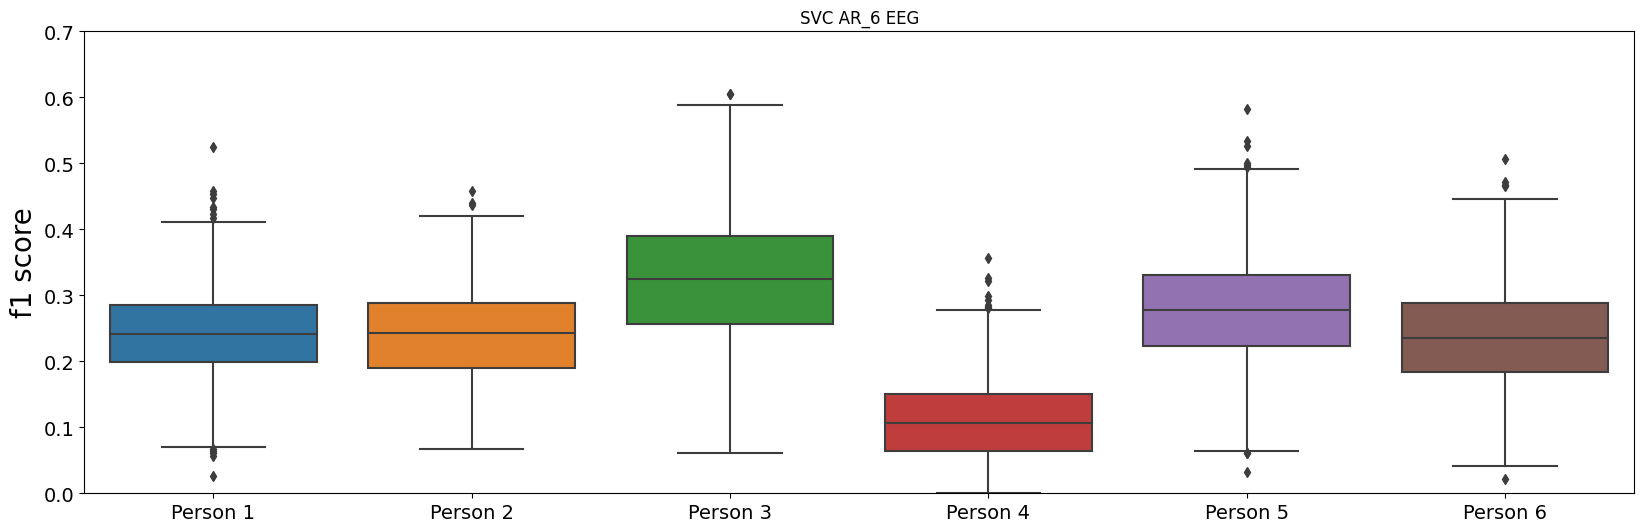

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_DTW_6AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_6 EEG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### EEG_DTW_8AR

In [ ]:
all_boot_f1score_EEG_DTW_8AR = get_all_boot_f1score_m1(columns_8, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_DTW_8AR.csv')

Испытуемый 0: F1 score - [0.07328446 0.28746929]
Испытуемый 1: F1 score - [0.15031013 0.3868164 ]
Испытуемый 2: F1 score - [0.10481951 0.39102813]
Испытуемый 3: F1 score - [0.01767857 0.27860837]
Испытуемый 4: F1 score - [0.09021987 0.35022835]
Испытуемый 5: F1 score - [0.08764249 0.30964887]


In [ ]:
print('EEG_DTW_8AR')

data = all_boot_f1score_EEG_DTW_8AR

print(f'Person MEAN: {[round(round(np.mean(i), 3)*100,1) for i in data]}')
print(f'MEAN: {np.mean([round(round(np.mean(i), 3)*100,1) for i in data])}')

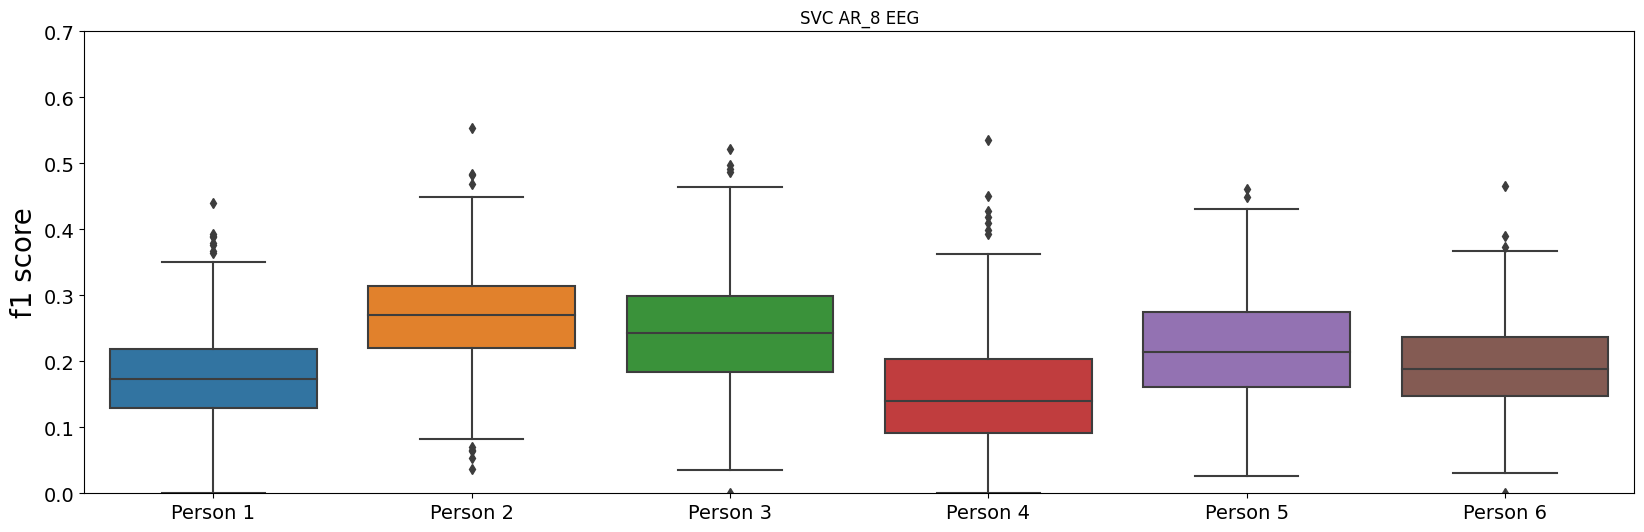

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_DTW_8AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_8 EEG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# **Binary classification**

## Open test/train split **file**

In [17]:
with open('/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/train_test_split_BinaryClass.json', 'r') as file:
    dataset_obj = json.load(file)
print(dataset_obj)

{'0': {'phoneme 0 and 1': {'X_train_sectors': [59, 116, 56, 102, 121, 157, 26, 143, 39, 1, 100, 160, 130, 135, 54, 11, 149, 156, 64, 81, 168, 32, 104, 163, 138, 17, 137, 112, 77, 43, 136, 151, 115, 63, 30, 145, 111, 66, 152], 'X_test_sectors': [8, 99, 27, 5, 67, 103, 150, 171, 128, 161, 154, 15, 78], 'y_train': [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1], 'y_test': [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]}, 'phoneme 0 and 2': {'X_train_sectors': [123, 59, 127, 78, 156, 54, 117, 115, 40, 80, 3, 100, 88, 134, 15, 130, 112, 161, 35, 95, 128, 84, 48, 110, 122, 34, 103, 8, 157, 163, 89, 121, 141, 165, 92, 17, 151, 66], 'X_test_sectors': [49, 144, 63, 72, 91, 102, 73, 138, 26, 145, 12, 50, 137], 'y_train': [2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0], 'y_test': [2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0]}, 'phoneme 0 and 3': {'X_train_sectors': [8, 138, 4

In [18]:
def myBinarySVC(X_train, X_test, y_train, params):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(X_train)
    x_test = scaler.transform(X_test)

    clf = SVC(kernel = params['kernel'],
            C = params['C'],
            degree = params['degree'],
            gamma = params['gamma'],
            )

    clf.fit(x_train, y_train)

    return clf.predict(x_test)

In [19]:
def get_metric_in_person_birary_class(dataset_obj, dataset, i_person, columns_,  kernel = 'rbf', degree = 3, gamma = 'scale', C = 1.0,):
    '''Get bootstrap metric f1score in birary classificaion'''

    person_boot_f1score_m1 = []

    for i_first_label in range(6):
            for i_second_label in range(i_first_label+1, 7):

                data = dataset_obj[f'{i_person}'][f'phoneme {i_first_label} and {i_second_label}']

                X_train_sectors = data['X_train_sectors']
                X_test_sectors = data['X_test_sectors']
                y_train = data['y_train']
                y_test = np.array(data['y_test'])

                df = dataset.query(f'person_id == {i_person}')
                df.set_index("sector_id", inplace = True)
                a = df[columns_]

                X_train = []
                for n in X_train_sectors:
                    all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
                    X_train.append(all.reshape(-1))

                X_test = []
                for n in  X_test_sectors:
                    all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
                    X_test.append(all.reshape(-1))

                params = {'kernel': kernel, 'C': C, 'degree': degree, 'gamma': gamma}

                predicted = myBinarySVC(X_train, X_test, y_train, params)

                boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
                person_boot_f1score_m1.append(boot_f1score_m1)

                alpha = 0.10
                #print(f'SUBJECT {i_person}')
               # print(f'phoneme {i_first_label} and {i_second_label}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')
    return person_boot_f1score_m1

## Experements with SVM Kernel

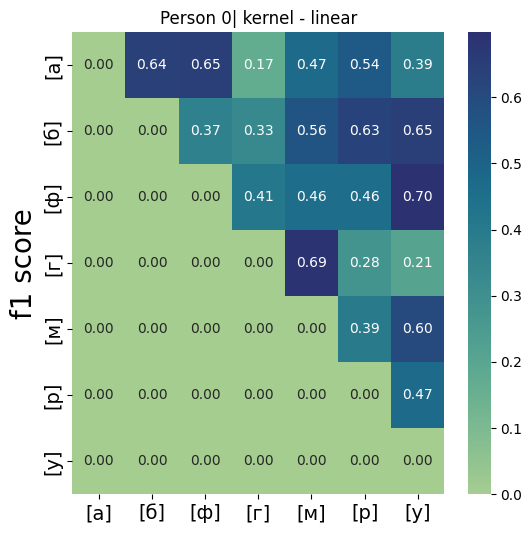

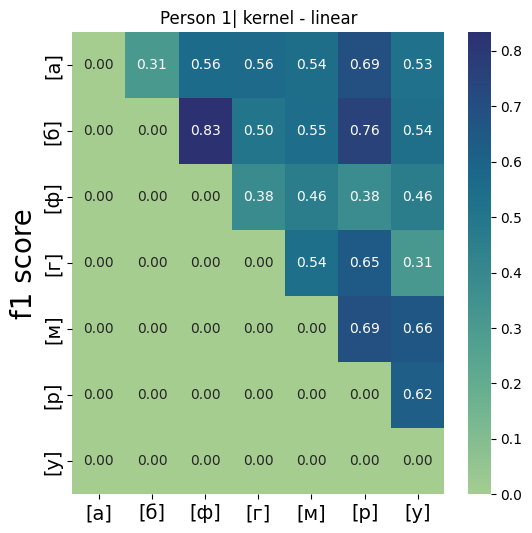

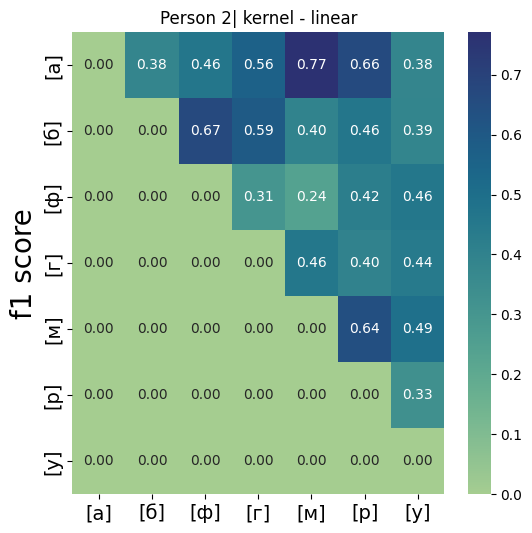

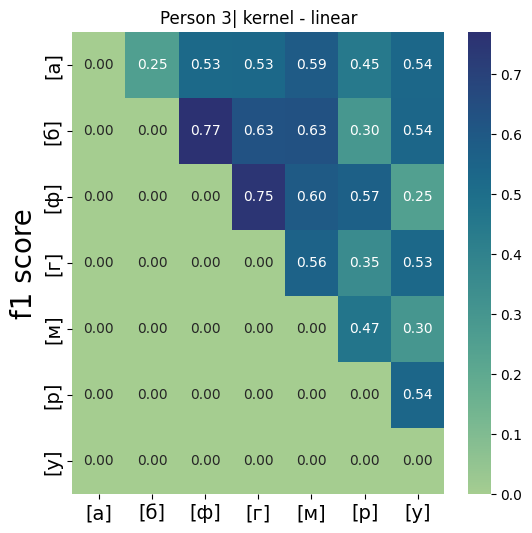

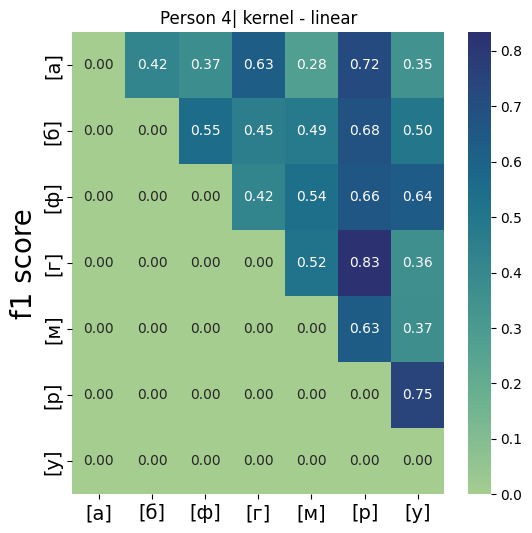

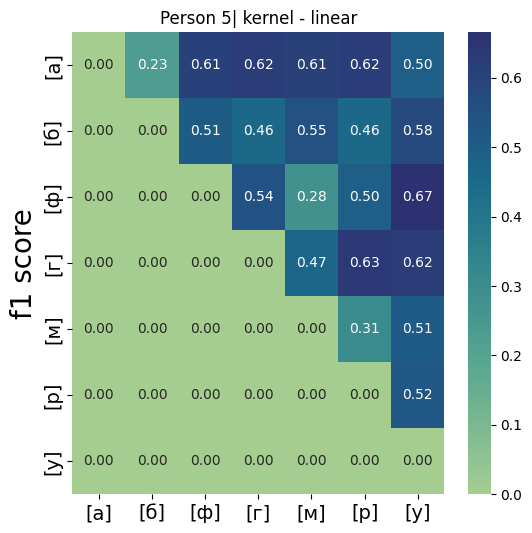

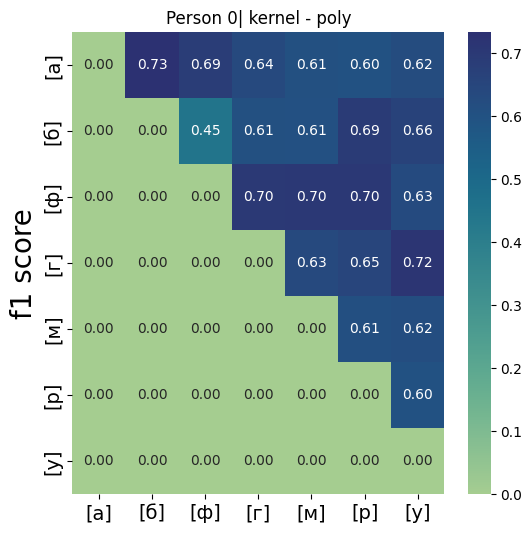

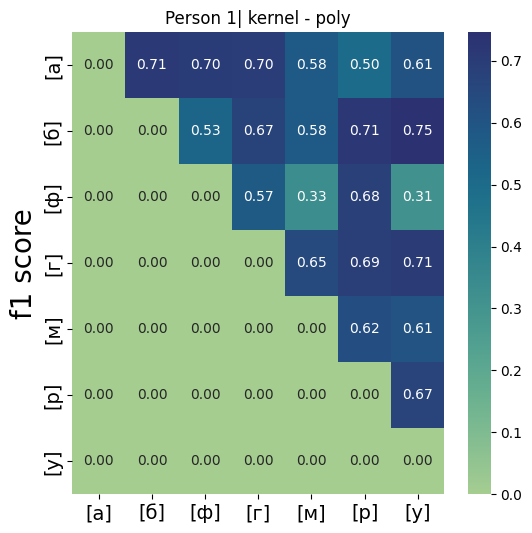

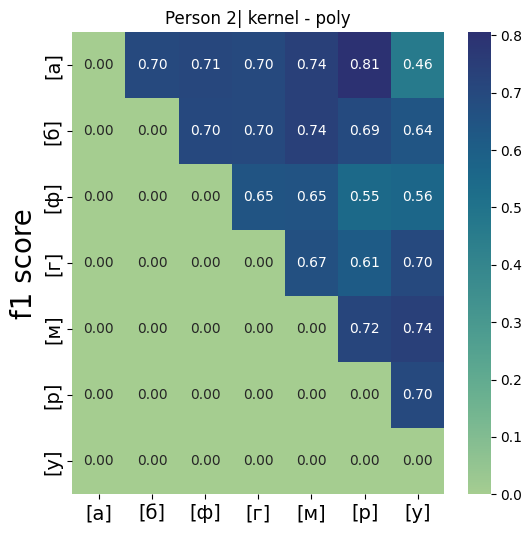

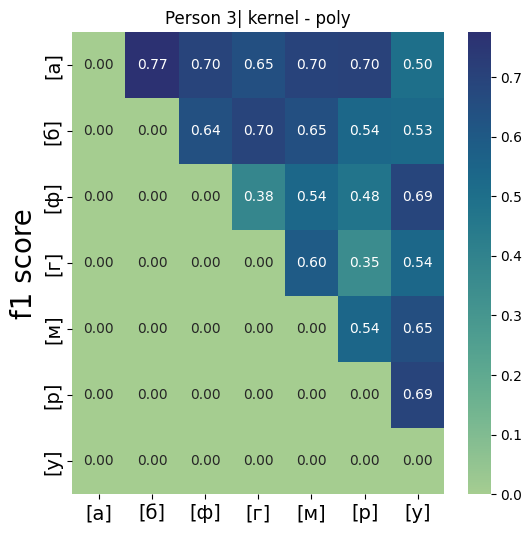

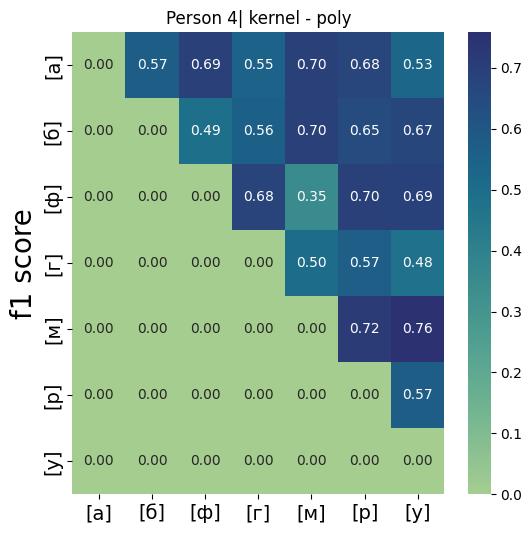

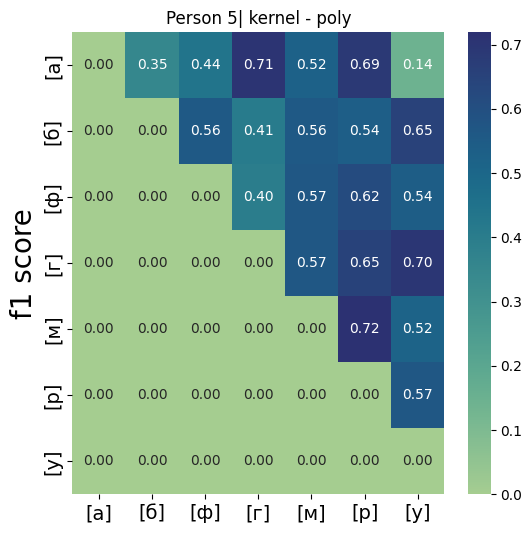

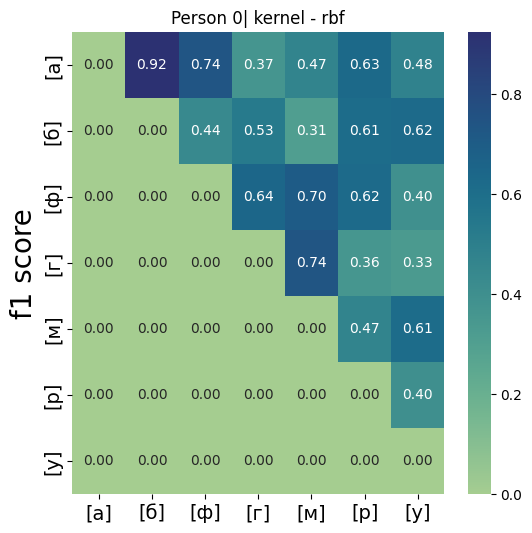

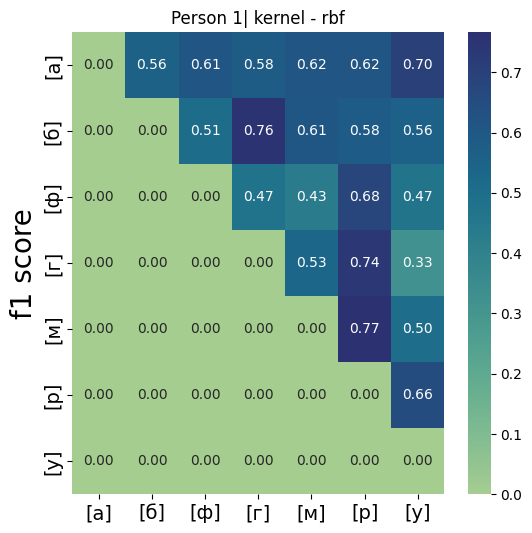

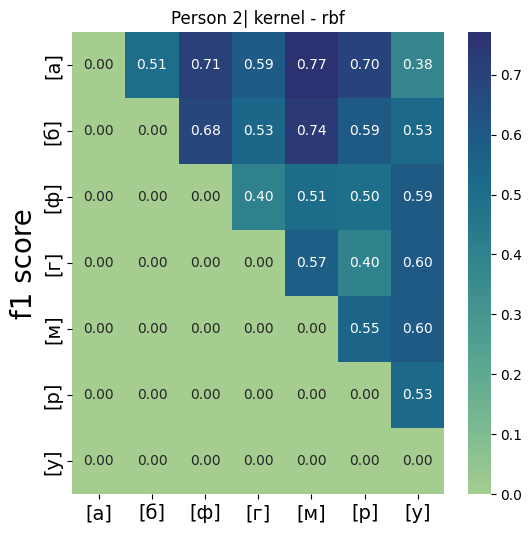

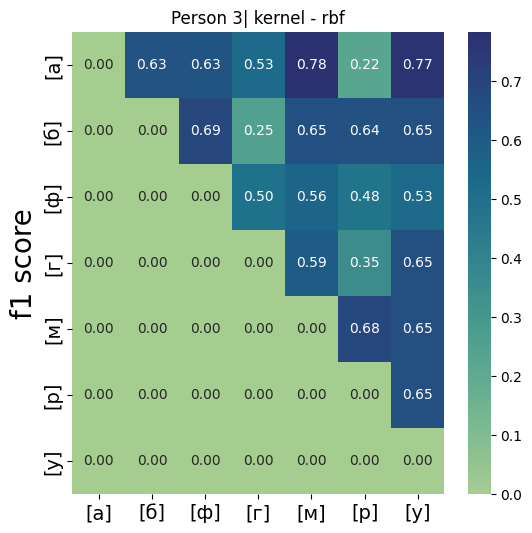

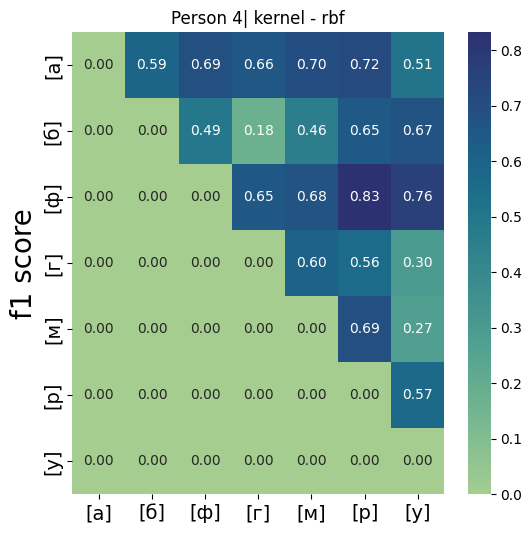

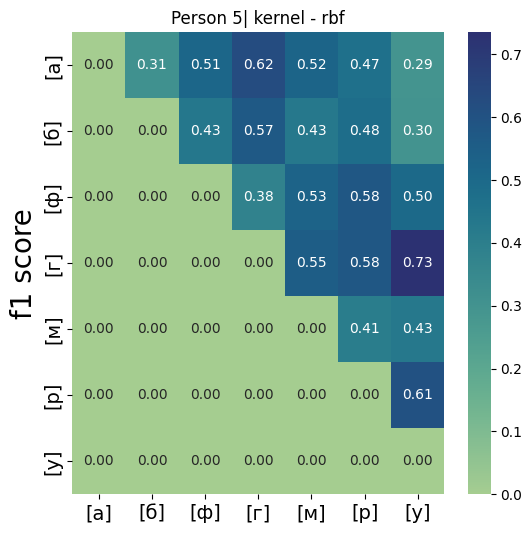

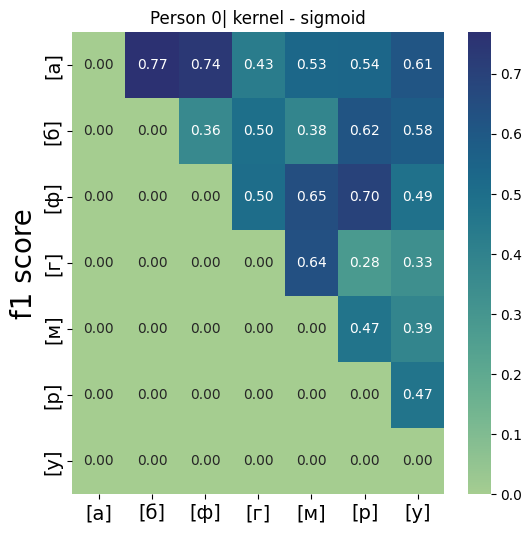

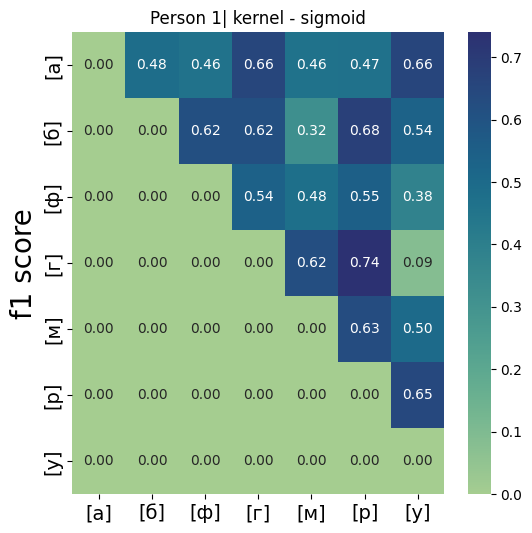

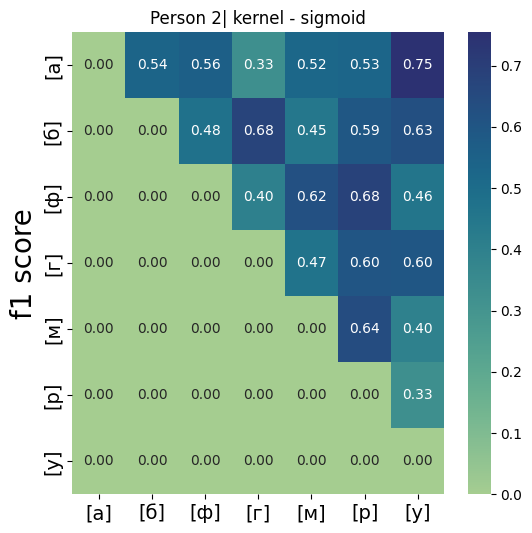

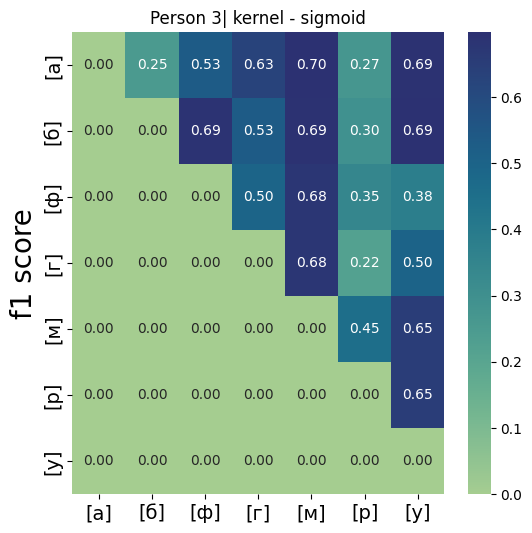

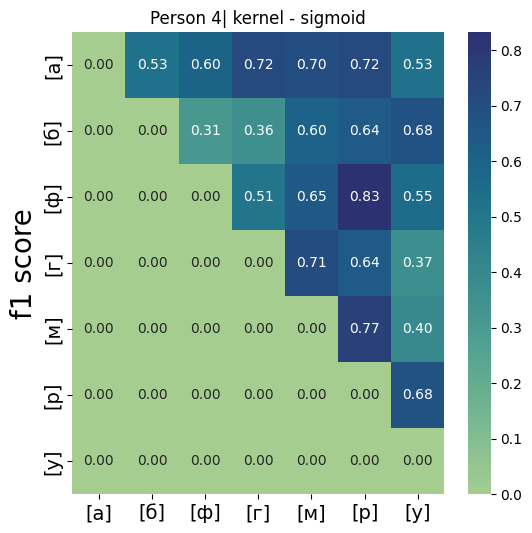

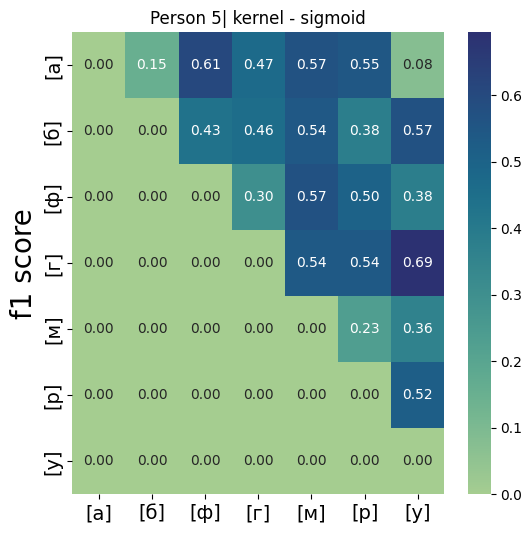

In [20]:
all_boot_f1score_m1  = []
file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_DTW_6AR.csv'
dataset = pd.read_csv(file_)


for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):

    for i_person in range(6):
        plt.figure(figsize=(6, 6))

        person_bs_f1score_m1 = get_metric_in_person_birary_class(dataset_obj, dataset, i_person, columns_6, kernel = kernel )

        array_of_mean_f1score_m1 = [[0] * 7 for i in range(7)]

        # for heatmap. Made 2d array
        i = 0
        for i_first_label in range(6):
            for i_second_label in range(i_first_label+1, 7):
               array_of_mean_f1score_m1[i_first_label][i_second_label] = np.mean(person_bs_f1score_m1[i])
               i+=1

        ticklabels = ['[а]','[б]','[ф]', '[г]', '[м]', '[р]','[у]']
        sns.heatmap(array_of_mean_f1score_m1, cmap="crest", annot=True, fmt=".2f", xticklabels = ticklabels, yticklabels = ticklabels)

        plt.ylabel("f1 score", size=20)
        plt.title(f'Person {i_person}| kernel - {kernel}')
        plt.tick_params(axis='both', which='major', labelsize=14)
        plt.show()

        #print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

## SVM poli

### OPTUNA

In [21]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.5 MB/s eta 0:00:00


In [22]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [23]:
import optuna
from optuna.samplers import RandomSampler

Use OPTUNA for first person

In [24]:
i_person = 2
i_first_label = 2
i_second_label = 3

data = dataset_obj[f'{i_person}'][f'phoneme {i_first_label} and {i_second_label}']

X_train_sectors = data['X_train_sectors']
X_test_sectors = data['X_test_sectors']
y_train = data['y_train']
y_test = np.array(data['y_test'])


df = dataset.query(f'person_id == {i_person}')
df.set_index("sector_id", inplace = True)
a = df[columns_6]

X_train = []
for n in X_train_sectors:
    all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
    X_train.append(all.reshape(-1))

X_test = []
for n in  X_test_sectors:
    all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
    X_test.append(all.reshape(-1))

In [25]:
# Define function which will optimized
def objective(trial):
    # boundaries for the optimizer's

    C = trial.suggest_float("C", 0.1, 2.5, step = 0.1)
    degree = trial.suggest_int("degree", 1, 6, step = 1)
    gamma = trial.suggest_float("gamma", 0.0005, 0.05, step = 0.005)

    # create new model(and all parameters) every iteration
    scaler = StandardScaler()
    x_train = scaler.fit_transform(X_train)
    x_test = scaler.transform(X_test)

    clf = SVC(kernel = 'poly',
              decision_function_shape = 'ovo',
              C = C,
              degree = degree,
              gamma = gamma,
              )
    clf.fit(x_train, y_train)
    predicted = clf.predict(x_test)

    boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
    return boot_f1score_m1.mean()

In [26]:
# Create "exploration"
study = optuna.create_study(
    direction="maximize", study_name="Optimizer", sampler=RandomSampler(42)
)

study.optimize(
    objective, n_trials=200
)  # The more iterations, the higher the chances of catching the most optimal hyperparameters

[I 2024-04-13 11:08:50,080] A new study created in memory with name: Optimizer
[I 2024-04-13 11:08:53,080] Trial 0 finished with value: 0.3693243713802537 and parameters: {'C': 1.0, 'degree': 6, 'gamma': 0.035500000000000004}. Best is trial 0 with value: 0.3693243713802537.
[I 2024-04-13 11:08:55,660] Trial 1 finished with value: 0.3088465611839141 and parameters: {'C': 1.5000000000000002, 'degree': 1, 'gamma': 0.0055}. Best is trial 0 with value: 0.3693243713802537.
[I 2024-04-13 11:08:59,830] Trial 2 finished with value: 0.3693243713802537 and parameters: {'C': 0.2, 'degree': 6, 'gamma': 0.0305}. Best is trial 0 with value: 0.3693243713802537.
[I 2024-04-13 11:09:08,404] Trial 3 finished with value: 0.306263326232591 and parameters: {'C': 1.8000000000000003, 'degree': 1, 'gamma': 0.0455}. Best is trial 0 with value: 0.3693243713802537.
[I 2024-04-13 11:09:10,832] Trial 4 finished with value: 0.42577296642899587 and parameters: {'C': 2.1, 'degree': 2, 'gamma': 0.0055}. Best is trial 4

In [27]:
optuna.visualization.plot_optimization_history(study)

In [28]:
params = ["C", "degree", "gamma"]
optuna.visualization.plot_slice(study, params=params, target_name="f1_score")

In [29]:
# best param
C = 0.5
degree = 2
gamma = 0.0005
kernel = 'poly'

In [41]:
def calculate_bs_F1(dataset_obj, file, columns, C = 0.5, degree = 2, gamma = 0.0005, kernel = 'poly'):
    dataset = pd.read_csv(file)

    all_bs_f1score  = []
    for i_person in range(6):
        plt.figure(figsize=(4, 4))

        person_bs_f1score_m1 = get_metric_in_person_birary_class(dataset_obj,
                                                                dataset,
                                                                i_person,
                                                                columns,
                                                                kernel = kernel,
                                                                C = C,
                                                                degree = degree,
                                                                gamma = gamma,
                                                                )
        all_bs_f1score.append(person_bs_f1score_m1)

        # for heatmap. Made 2d array
        array_of_mean_f1score_m1 = [[0] * 7 for i in range(7)]
        i = 0
        for i_first_label in range(6):
            for i_second_label in range(i_first_label+1, 7):
                array_of_mean_f1score_m1[i_first_label][i_second_label] = np.mean(person_bs_f1score_m1[i])
                i+=1

        plt.title(f'Person {i_person}')
        ticklabels = ['[а]','[б]','[ф]', '[г]', '[м]', '[р]','[у]']
        sns.heatmap(array_of_mean_f1score_m1, cmap="crest", annot=True, fmt=".2f", xticklabels = ticklabels, yticklabels = ticklabels)

        plt.ylabel("f1 score", size = 10)
        plt.tick_params(axis='both', which='major', labelsize=14)
        plt.show()
    return all_bs_f1score

In [31]:
def get_result(data):
    for i_person in range(6):
        print(f'____Person { i_person }')

        print(f'Person MEAN: {[round(round(np.mean(i), 3)*100,1) for i in data[i_person] ]}')
        print(f'MEAN: {np.mean([round(round(np.mean(i), 3)*100,1) for i in data[i_person] ])}')

        ticklabels = ['[а]','[б]','[ф]', '[г]', '[м]', '[р]','[у]']

        i = 0
        for i_first_label in range(6):
            for i_second_label in range(i_first_label+1, 7):


                alpha = 0.1
                confidence_interval = np.quantile(data[i_person][i], q=[alpha/2, 1 - alpha/2])

                print(f'{ticklabels[i_first_label ]}-{ticklabels[i_second_label]} : {np.round(confidence_interval, 2)}')
                i+=1

### EEG_EMG_DTW_4AR

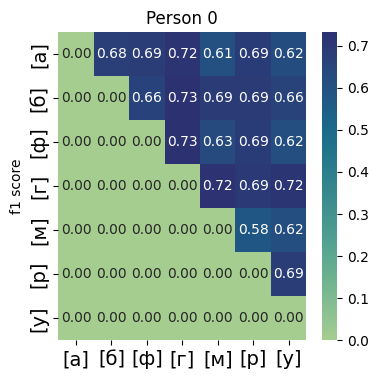

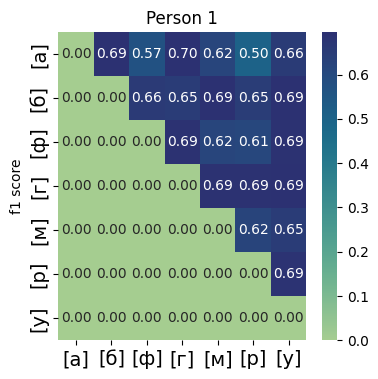

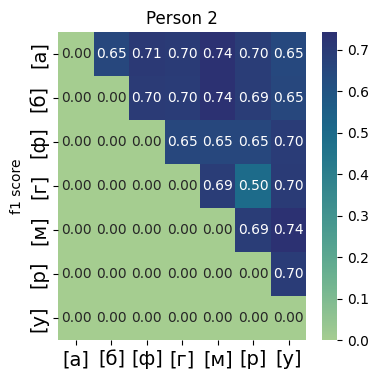

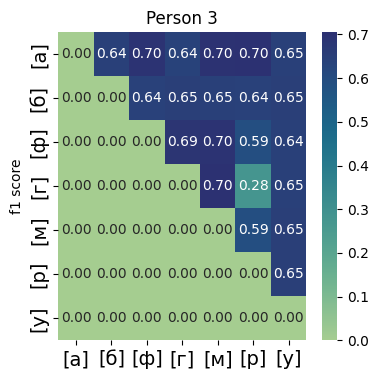

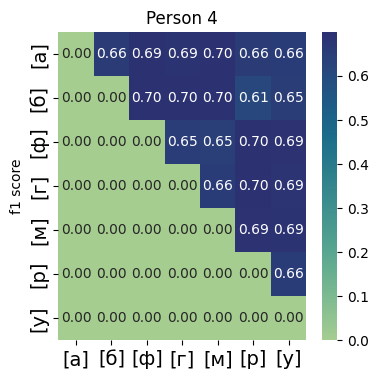

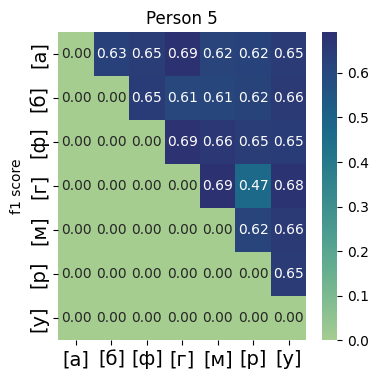

In [42]:
file = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_4AR.csv'
all_bs_f1score_EEG_EMG_DTW_4AR = calculate_bs_F1(dataset_obj, file, columns_4)

In [43]:
get_result(all_bs_f1score_EEG_EMG_DTW_4AR)

____Person 0
Person MEAN: [67.9, 68.5, 71.9, 60.9, 68.7, 62.5, 65.9, 72.8, 69.3, 69.3, 66.2, 73.2, 63.4, 68.8, 61.6, 72.4, 69.5, 71.7, 58.3, 62.0, 68.5]
MEAN: 67.3
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.47 0.87]
[а]-[г] : [0.5  0.91]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.47 0.87]
[а]-[у] : [0.38 0.82]
[б]-[ф] : [0.44 0.83]
[б]-[г] : [0.5  0.91]
[б]-[м] : [0.47 0.87]
[б]-[р] : [0.47 0.87]
[б]-[у] : [0.44 0.83]
[ф]-[г] : [0.5  0.91]
[ф]-[м] : [0.38 0.82]
[ф]-[р] : [0.47 0.87]
[ф]-[у] : [0.38 0.82]
[г]-[м] : [0.5  0.91]
[г]-[р] : [0.43 0.9 ]
[г]-[у] : [0.5  0.91]
[м]-[р] : [0.35 0.82]
[м]-[у] : [0.38 0.82]
[р]-[у] : [0.47 0.87]
____Person 1
Person MEAN: [69.4, 57.2, 69.6, 62.1, 50.3, 65.7, 66.2, 65.5, 69.2, 65.1, 69.0, 68.9, 62.2, 61.3, 68.9, 68.8, 68.9, 69.2, 62.4, 65.4, 68.7]
MEAN: 65.42857142857144
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.35 0.8 ]
[а]-[г] : [0.47 0.87]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.25 0.71]
[а]-[у] : [0.44 0.83]
[б]-[ф] : [0.4  0.86]
[б]-[г] : [0.4  0.86]
[б]-[м] : [0.47 0.87]

### EEG_EMG_DTW_6AR

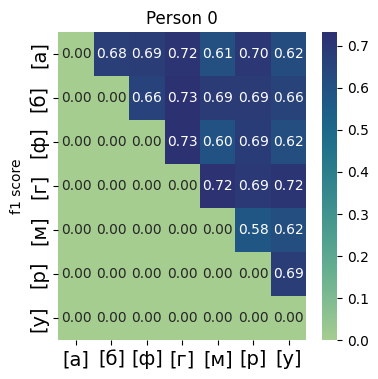

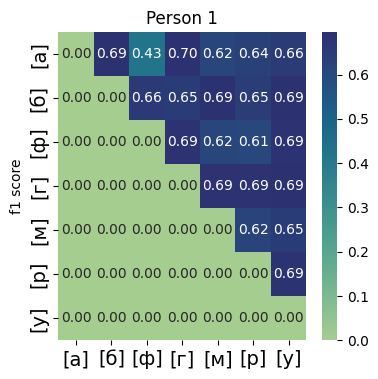

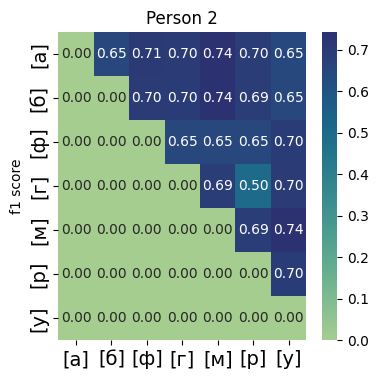

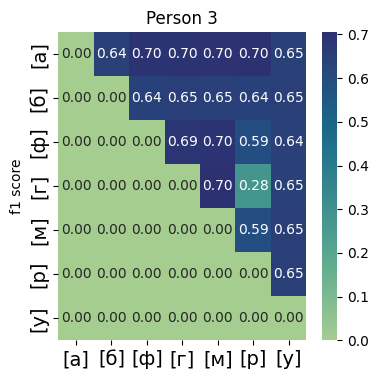

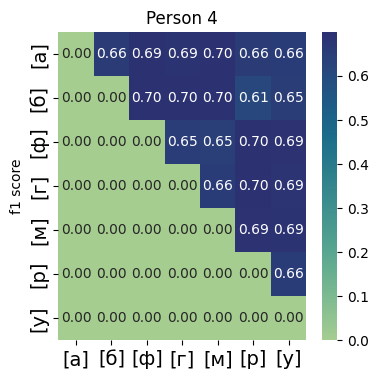

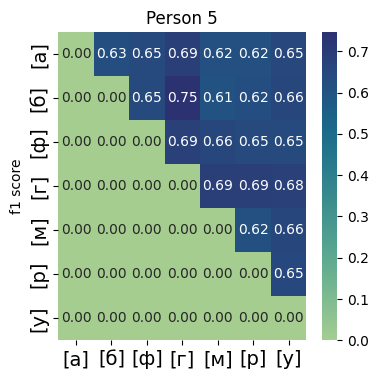

In [44]:
file = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_6AR.csv'
all_bs_f1score_EEG_EMG_DTW_6AR = calculate_bs_F1(dataset_obj, file, columns_6)

In [45]:
get_result(all_bs_f1score_EEG_EMG_DTW_6AR)

____Person 0
Person MEAN: [67.9, 68.5, 71.9, 60.9, 70.4, 62.5, 65.9, 72.8, 69.3, 69.3, 66.2, 73.2, 59.5, 68.8, 61.6, 72.4, 69.5, 71.7, 58.3, 62.0, 68.5]
MEAN: 67.1952380952381
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.47 0.87]
[а]-[г] : [0.5  0.91]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.48 0.88]
[а]-[у] : [0.38 0.82]
[б]-[ф] : [0.44 0.83]
[б]-[г] : [0.5  0.91]
[б]-[м] : [0.47 0.87]
[б]-[р] : [0.47 0.87]
[б]-[у] : [0.44 0.83]
[ф]-[г] : [0.5  0.91]
[ф]-[м] : [0.35 0.82]
[ф]-[р] : [0.47 0.87]
[ф]-[у] : [0.38 0.82]
[г]-[м] : [0.5  0.91]
[г]-[р] : [0.43 0.9 ]
[г]-[у] : [0.5  0.91]
[м]-[р] : [0.35 0.82]
[м]-[у] : [0.38 0.82]
[р]-[у] : [0.47 0.87]
____Person 1
Person MEAN: [69.4, 42.7, 69.6, 62.1, 63.8, 65.7, 66.2, 65.5, 69.2, 65.1, 69.0, 68.9, 62.2, 61.3, 68.9, 68.8, 68.9, 69.2, 62.4, 65.4, 68.7]
MEAN: 65.38095238095241
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.21 0.65]
[а]-[г] : [0.47 0.87]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.38 0.82]
[а]-[у] : [0.44 0.83]
[б]-[ф] : [0.4  0.86]
[б]-[г] : [0.4  0.86]
[б]-[м] :

### EEG_EMG_DTW_8AR

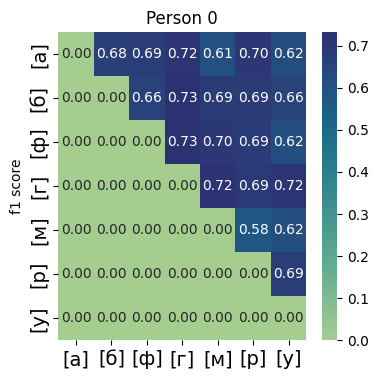

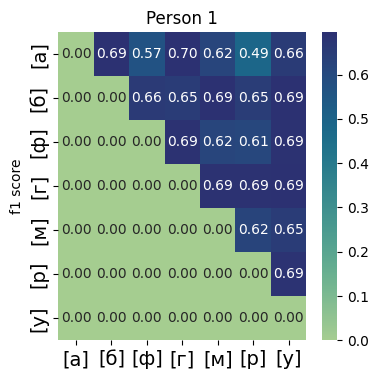

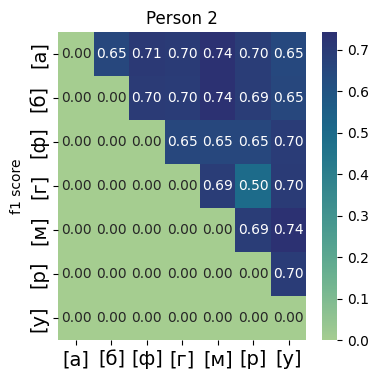

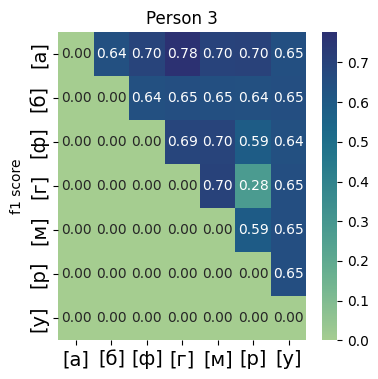

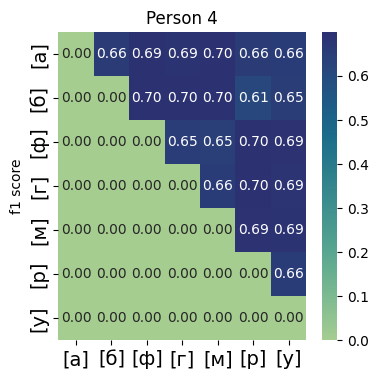

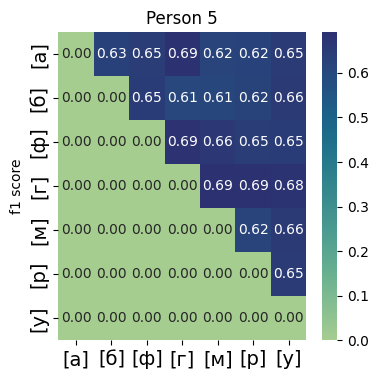

In [46]:
file = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_EMG_DTW_8AR.csv'
all_bs_f1score_EEG_EMG_DTW_8AR = calculate_bs_F1(dataset_obj, file, columns_8)

In [47]:
get_result(all_bs_f1score_EEG_EMG_DTW_8AR)

____Person 0
Person MEAN: [67.9, 68.5, 71.9, 60.9, 70.4, 62.5, 65.9, 72.8, 69.3, 69.3, 66.2, 73.2, 70.4, 68.8, 61.6, 72.4, 69.5, 71.7, 58.3, 62.0, 68.5]
MEAN: 67.71428571428571
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.47 0.87]
[а]-[г] : [0.5  0.91]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.48 0.88]
[а]-[у] : [0.38 0.82]
[б]-[ф] : [0.44 0.83]
[б]-[г] : [0.5  0.91]
[б]-[м] : [0.47 0.87]
[б]-[р] : [0.47 0.87]
[б]-[у] : [0.44 0.83]
[ф]-[г] : [0.5  0.91]
[ф]-[м] : [0.48 0.88]
[ф]-[р] : [0.47 0.87]
[ф]-[у] : [0.38 0.82]
[г]-[м] : [0.5  0.91]
[г]-[р] : [0.43 0.9 ]
[г]-[у] : [0.5  0.91]
[м]-[р] : [0.35 0.82]
[м]-[у] : [0.38 0.82]
[р]-[у] : [0.47 0.87]
____Person 1
Person MEAN: [69.4, 56.8, 69.6, 62.1, 48.5, 65.7, 66.2, 65.5, 69.2, 65.1, 69.0, 68.9, 62.2, 61.3, 68.9, 68.8, 68.9, 69.2, 62.4, 65.4, 68.7]
MEAN: 65.32380952380954
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.35 0.76]
[а]-[г] : [0.47 0.87]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.26 0.7 ]
[а]-[у] : [0.44 0.83]
[б]-[ф] : [0.4  0.86]
[б]-[г] : [0.4  0.86]
[б]-[м] 

### EEG_DTW_4AR

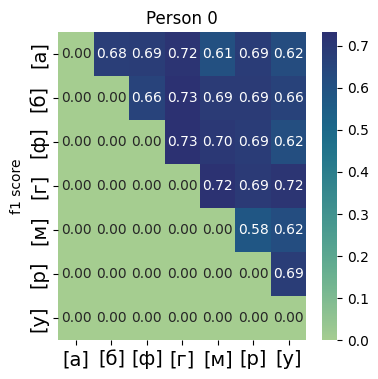

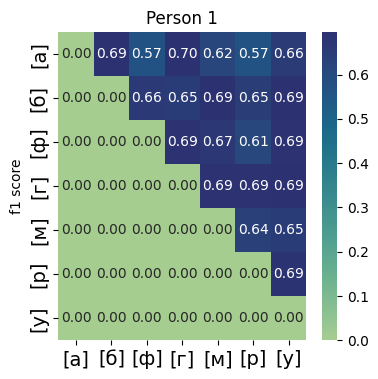

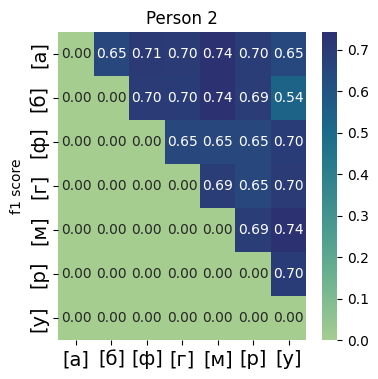

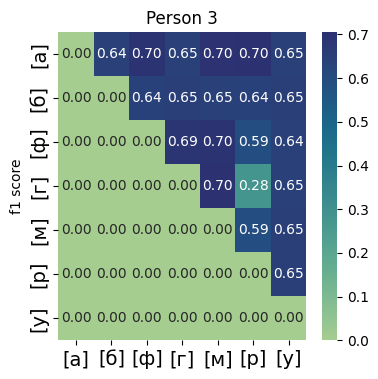

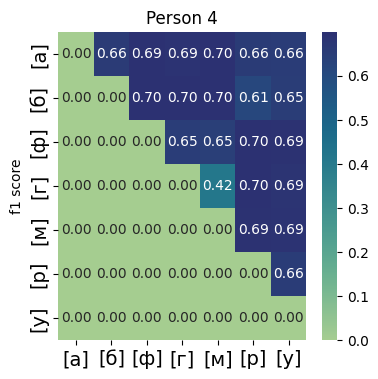

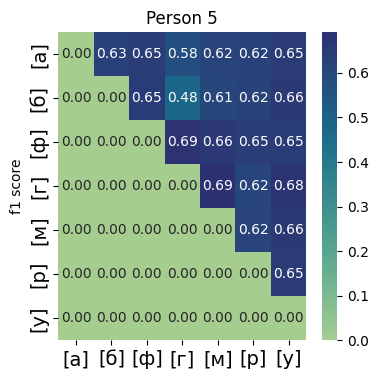

In [48]:
file = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_DTW_4AR.csv'
all_bs_f1score_EEG_DTW_4AR = calculate_bs_F1(dataset_obj, file, columns_4)

In [49]:
get_result(all_bs_f1score_EEG_DTW_4AR)

____Person 0
Person MEAN: [67.9, 68.5, 71.9, 60.9, 68.7, 62.5, 65.9, 72.8, 69.3, 69.3, 66.2, 73.2, 70.4, 68.8, 61.6, 72.4, 69.5, 71.7, 58.3, 62.0, 68.5]
MEAN: 67.63333333333334
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.47 0.87]
[а]-[г] : [0.5  0.91]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.47 0.87]
[а]-[у] : [0.38 0.82]
[б]-[ф] : [0.44 0.83]
[б]-[г] : [0.5  0.91]
[б]-[м] : [0.47 0.87]
[б]-[р] : [0.47 0.87]
[б]-[у] : [0.44 0.83]
[ф]-[г] : [0.5  0.91]
[ф]-[м] : [0.48 0.88]
[ф]-[р] : [0.47 0.87]
[ф]-[у] : [0.38 0.82]
[г]-[м] : [0.5  0.91]
[г]-[р] : [0.43 0.9 ]
[г]-[у] : [0.5  0.91]
[м]-[р] : [0.35 0.82]
[м]-[у] : [0.38 0.82]
[р]-[у] : [0.47 0.87]
____Person 1
Person MEAN: [69.4, 56.8, 69.6, 62.1, 56.8, 65.7, 66.2, 65.5, 69.2, 65.1, 69.0, 68.9, 67.0, 61.3, 68.9, 68.8, 68.9, 69.2, 63.9, 65.4, 68.7]
MEAN: 66.01904761904764
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.35 0.76]
[а]-[г] : [0.47 0.87]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.35 0.76]
[а]-[у] : [0.44 0.83]
[б]-[ф] : [0.4  0.86]
[б]-[г] : [0.4  0.86]
[б]-[м] 

### EEG_DTW_6AR

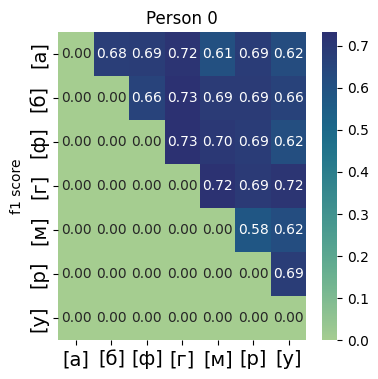

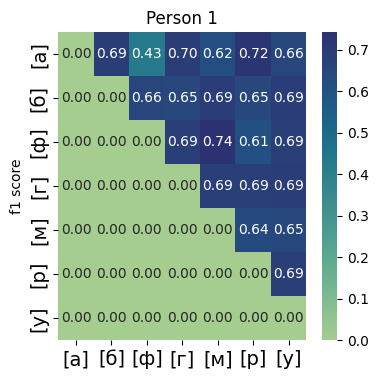

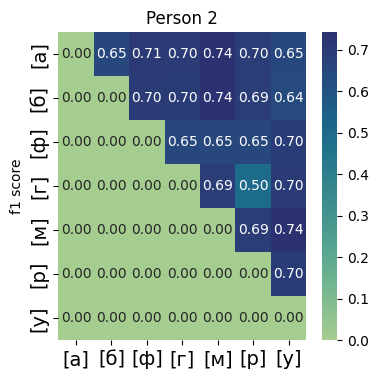

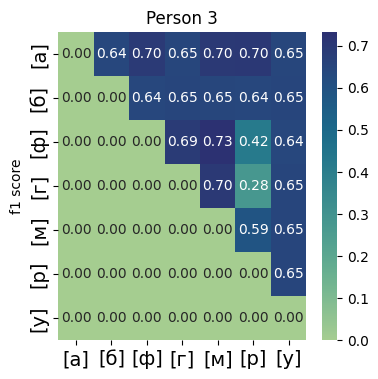

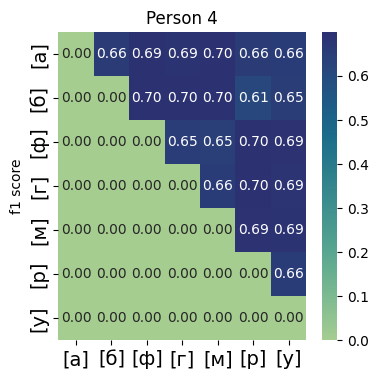

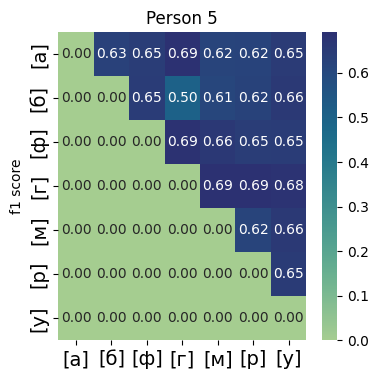

In [50]:
file = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_DTW_6AR.csv'
all_bs_f1score_EEG_DTW_6AR = calculate_bs_F1(dataset_obj, file, columns_6)

In [51]:
get_result(all_bs_f1score_EEG_DTW_6AR)

____Person 0
Person MEAN: [67.9, 68.5, 71.9, 60.9, 68.7, 62.5, 65.9, 72.8, 69.3, 69.3, 66.2, 73.2, 70.4, 68.8, 61.6, 72.4, 69.5, 71.7, 58.3, 62.0, 68.5]
MEAN: 67.63333333333334
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.47 0.87]
[а]-[г] : [0.5  0.91]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.47 0.87]
[а]-[у] : [0.38 0.82]
[б]-[ф] : [0.44 0.83]
[б]-[г] : [0.5  0.91]
[б]-[м] : [0.47 0.87]
[б]-[р] : [0.47 0.87]
[б]-[у] : [0.44 0.83]
[ф]-[г] : [0.5  0.91]
[ф]-[м] : [0.48 0.88]
[ф]-[р] : [0.47 0.87]
[ф]-[у] : [0.38 0.82]
[г]-[м] : [0.5  0.91]
[г]-[р] : [0.43 0.9 ]
[г]-[у] : [0.5  0.91]
[м]-[р] : [0.35 0.82]
[м]-[у] : [0.38 0.82]
[р]-[у] : [0.47 0.87]
____Person 1
Person MEAN: [69.4, 42.7, 69.6, 62.1, 72.3, 65.7, 66.2, 65.5, 69.2, 65.1, 69.0, 68.9, 74.2, 61.3, 68.9, 68.8, 68.9, 69.2, 63.9, 65.4, 68.7]
MEAN: 66.42857142857144
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.21 0.65]
[а]-[г] : [0.47 0.87]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.52 0.92]
[а]-[у] : [0.44 0.83]
[б]-[ф] : [0.4  0.86]
[б]-[г] : [0.4  0.86]
[б]-[м] 


### EEG_DTW_8AR

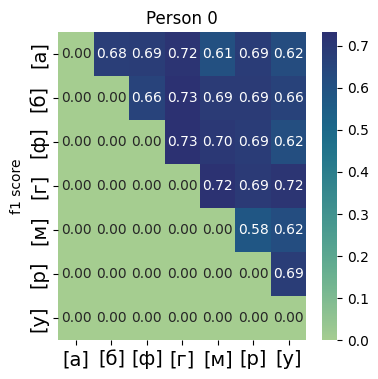

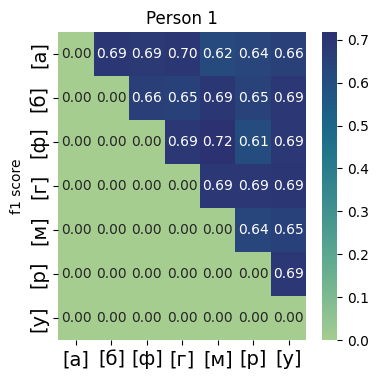

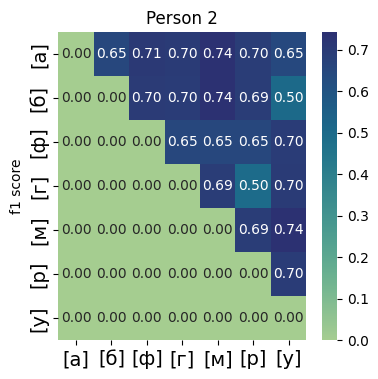

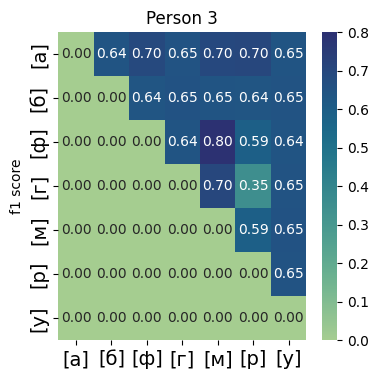

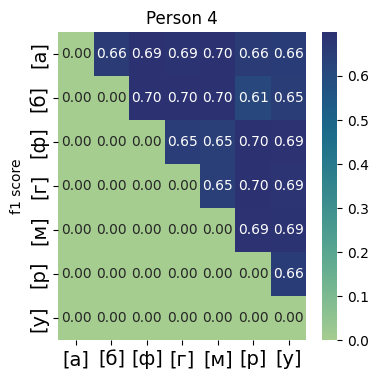

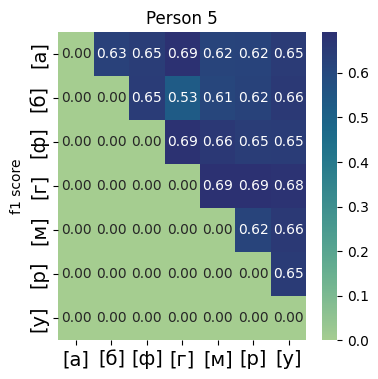

In [52]:
file = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/Data_EEG+EMG_csv/phoneme_EEG_DTW_8AR.csv'
all_bs_f1score_EEG_DTW_8AR = calculate_bs_F1(dataset_obj, file, columns_8)

In [53]:
get_result(all_bs_f1score_EEG_DTW_8AR)

____Person 0
Person MEAN: [67.9, 68.5, 71.9, 60.9, 68.7, 62.5, 65.9, 72.8, 69.3, 69.3, 66.2, 73.2, 70.4, 68.8, 61.6, 72.4, 69.5, 71.7, 58.3, 62.0, 68.5]
MEAN: 67.63333333333334
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.47 0.87]
[а]-[г] : [0.5  0.91]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.47 0.87]
[а]-[у] : [0.38 0.82]
[б]-[ф] : [0.44 0.83]
[б]-[г] : [0.5  0.91]
[б]-[м] : [0.47 0.87]
[б]-[р] : [0.47 0.87]
[б]-[у] : [0.44 0.83]
[ф]-[г] : [0.5  0.91]
[ф]-[м] : [0.48 0.88]
[ф]-[р] : [0.47 0.87]
[ф]-[у] : [0.38 0.82]
[г]-[м] : [0.5  0.91]
[г]-[р] : [0.43 0.9 ]
[г]-[у] : [0.5  0.91]
[м]-[р] : [0.35 0.82]
[м]-[у] : [0.38 0.82]
[р]-[у] : [0.47 0.87]
____Person 1
Person MEAN: [69.4, 68.5, 69.6, 62.1, 63.9, 65.7, 66.2, 65.5, 69.2, 65.1, 69.0, 68.9, 71.7, 61.3, 68.9, 68.8, 68.9, 69.2, 63.9, 65.4, 68.7]
MEAN: 67.13809523809526
[а]-[б] : [0.47 0.87]
[а]-[ф] : [0.47 0.87]
[а]-[г] : [0.47 0.87]
[а]-[м] : [0.38 0.82]
[а]-[р] : [0.38 0.82]
[а]-[у] : [0.44 0.83]
[б]-[ф] : [0.4  0.86]
[б]-[г] : [0.4  0.86]
[б]-[м] 